In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os, sys
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import utils
from pathlib import Path
import mplhep

sys.path.append("../../../analysisTools/")
import plotTools as ptools

# Plot 1D

In [2]:
prefix = './coffea/skimmed/'
suffix = '_SR_BDT_comb13_optv2'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/signal{suffix}_TrueVertex.coffea')[0]

In [4]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}_BestVertex.coffea')[0]

In [5]:
utils.get_signal_point_dict(sig_histo).sort_values(by=['m1'])

mchi  dmchi   ctau     m1     m2  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100      5.25    0.5  100.0    5.0    5.5   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1        5.25    0.5    1.0    5.0    5.5   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10       5.25    0.5   10.0    5.0    5.5   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1         5.50    1.0    1.0    5.0    6.0   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10        5.50    1.0   10.0    5.0    6.0   
...                                         ...    ...    ...    ...    ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10   110.00   20.0   10.0  100.0  120.0   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1    110.00   20.0    1.0  100.0  120.0   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100  105.00   10.0  100.0  100.0  110.0   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10   105.00   10.0   10.0  100.0  110.0   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1    105.00   10.0    1.0  100.0  110.0   

                                         delta  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100      0.1   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1        0.1   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10       0.1   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1         0.2   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10        0.2   
...                                        ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10     0.2   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1      0.2   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100    0.1   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10     0.1   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1      0.1   

                                                                            name  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100      sig_2018_Mchi-5p25_dMchi-0p5_ctau-100  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1          sig_2018_Mchi-5p25_dMchi-0p5_ctau-1  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10        sig_2018_Mchi-5p25_dMchi-0p5_ctau-10  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1            sig_2018_Mchi-5p5_dMchi-1p0_ctau-1  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10          sig_2018_Mchi-5p5_dMchi-1p0_ctau-10  
...                                                                          ...  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10    sig_2018_Mchi-110p0_dMchi-20p0_ctau-10  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1      sig_2018_Mchi-110p0_dMchi-20p0_ctau-1  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100  sig_2018_Mchi-105p0_dMchi-10p0_ctau-100  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10    sig_2018_Mchi-105p0_dMchi-10p0_ctau-10  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1      sig_2018_Mchi-105p0_dMchi-10p0_ctau-1  

[65 rows x 7 columns]

In [6]:
utils.get_signal_list_of_cuts(sig_histo)

['Preselections',
 '0 < n(jet) < 3 & n(good vertex) > 0',
 'computing BDT score',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 1.5',
 'dPhi(MET,all jets) > 0.75']

In [7]:
utils.get_signal_list_of_histograms(sig_histo)

['bdt_score',
 'cutDesc',
 'cutflow',
 'cutflow_cts',
 'cutflow_nevts',
 'cutflow_vtx_matched',
 'cutflow_genEEreconstructed',
 'cutflow_cts_genEEreconstructed',
 'cutflow_vtx_matched_genEEreconstructed',
 'cutflow_vtx_matched_genEEreconstructedVtx',
 'cutflow_vtx_matched_genEEreconstructedGoodVtx',
 'cutflow_vtx_matched_genEEreconstructedVtx_pteta',
 'cutflow_vtx_matched_genEEreconstructedVtx_ptetaoverlap',
 'cutflow_vtx_matched_genEEreconstructedVtx_ecuts']

### bdt_score

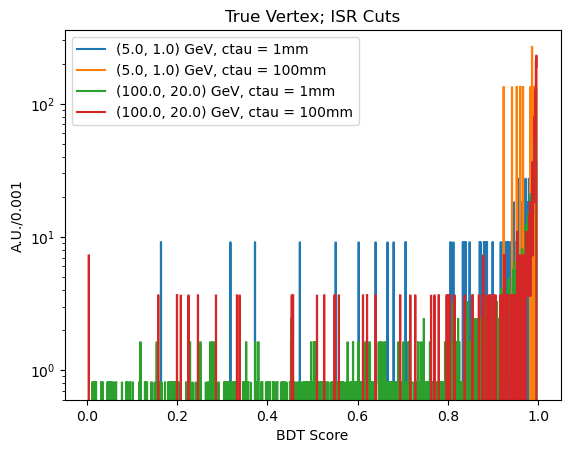

In [8]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'bdt_score',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Vertex; ISR Cuts')
plt.legend()
plt.show()

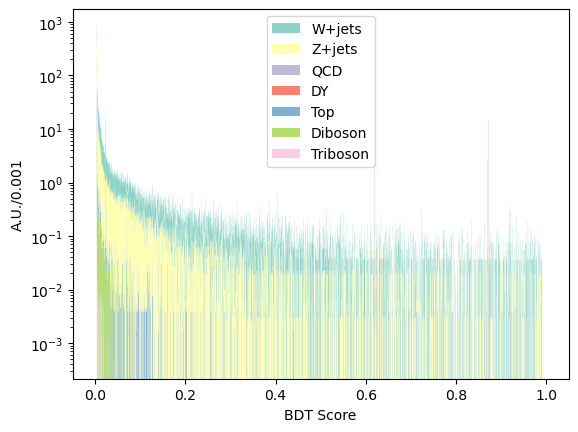

In [9]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### S/sqrt(B) scan for BDT WPs

In [10]:
sig_samples = list(sig_histo['cutflow'].keys())
print(sig_samples)

['sig_2018_Mchi-94p5_dMchi-9p0_ctau-100', 'sig_2018_Mchi-99p0_dMchi-18p0_ctau-100', 'sig_2018_Mchi-99p0_dMchi-18p0_ctau-1', 'sig_2018_Mchi-99p0_dMchi-18p0_ctau-10', 'sig_2018_Mchi-88p0_dMchi-16p0_ctau-100', 'sig_2018_Mchi-88p0_dMchi-16p0_ctau-10', 'sig_2018_Mchi-94p5_dMchi-9p0_ctau-10', 'sig_2018_Mchi-84p0_dMchi-8p0_ctau-10', 'sig_2018_Mchi-84p0_dMchi-8p0_ctau-100', 'sig_2018_Mchi-94p5_dMchi-9p0_ctau-1', 'sig_2018_Mchi-84p0_dMchi-8p0_ctau-1', 'sig_2018_Mchi-77p0_dMchi-14p0_ctau-100', 'sig_2018_Mchi-77p0_dMchi-14p0_ctau-1', 'sig_2018_Mchi-77p0_dMchi-14p0_ctau-10', 'sig_2018_Mchi-73p5_dMchi-7p0_ctau-100', 'sig_2018_Mchi-73p5_dMchi-7p0_ctau-10', 'sig_2018_Mchi-73p5_dMchi-7p0_ctau-1', 'sig_2018_Mchi-63p0_dMchi-6p0_ctau-100', 'sig_2018_Mchi-63p0_dMchi-6p0_ctau-10', 'sig_2018_Mchi-60p0_dMchi-20p0_ctau-100', 'sig_2018_Mchi-63p0_dMchi-6p0_ctau-1', 'sig_2018_Mchi-60p0_dMchi-20p0_ctau-10', 'sig_2018_Mchi-60p0_dMchi-20p0_ctau-1', 'sig_2018_Mchi-5p5_dMchi-1p0_ctau-100', 'sig_2018_Mchi-5p5_dMchi-1p

In [11]:
bkg_histos = {}
histograms = []

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}_BestVertex.coffea')[0]
    histograms = list(bkg_histos[b].keys())
    

In [12]:
bkg = {}

for h in histograms:
    bkg[h] = {}
    for b in bkg_histos.keys():
        if type(bkg_histos[b][h]) == hist.Hist and bkg_histos[b][h].sum(flow=True).value > 0:
            bkg[h][b] = bkg_histos[b][h][{"samp":sum}]

In [13]:
# Access all the sub-samples of the sample (or process) 'DY' at certain cut
s_over_b = {}
s = {}

cut = 'cut9'

hname = 'bdt_score'
rebin = 1j

bdts = []

for idx_sig, point in enumerate(sig_samples):
    #point = 'sig_2018_Mchi-5p5_dMchi-1p0_ctau-10'
    #print(point)
    # sig
    sig_hist = sig_histo[hname][{"samp":point,"cut":cut}][::rebin]
    
    bins = sig_hist.axes[0].edges[1:]
    
    s[point] = []
    for idx, bin_edge in enumerate(bins):
        if idx == 0:
            continue
        else:
            if idx_sig == 0:
                bdts.append(sig_hist[0:idx].axes.edges[0][-1])
            integral = sig_hist[0:idx].sum().value
            s[point].append(sig_hist.sum(flow=None).value - integral) # apply cut of: var > cutvalue
    
    # bkg
    for b in bkg_histos.keys():
        entries = {b: bkg[hname][b].sum().value for b in bkg_histos.keys()}
        
    sorted_entries = dict(sorted(entries.items(), key=lambda x:x[1], reverse = True))
    
    bkg_stack = {b:bkg[hname][b] for b in sorted_entries.keys()}
    avail_cuts = {b:[bkg_stack[b].axes[0].bin(i) for i in range(len(bkg_stack[b].axes[0].widths))] for b in bkg_stack.keys()}
    bkg_stack = {b:bkg_stack[b][cut,::rebin] for b in bkg_stack.keys() if cut in avail_cuts[b]}
    
    bkgs = [bkg_stack[process] for process in bkg_stack.keys()]
    bkg_total = sum(bkgs)
    
    b = []
    for idx, bin_edge in enumerate(bins):
        if idx == 0:
            continue
        else:
            integral = bkg_total[0:idx].sum().value
            b.append(bkg_total.sum(flow=None).value - integral) # apply cut of: var > cutvalue
    
    # s/sqrt(b)
    s[point] = np.array(s[point])
    b = np.array(b)
    
    s_over_b[point] = list(s[point]/np.sqrt(b))

/tmp/ipykernel_14851/3880032490.py:55: RuntimeWarning: divide by zero encountered in divide
  s_over_b[point] = list(s[point]/np.sqrt(b))
/tmp/ipykernel_14851/3880032490.py:55: RuntimeWarning: invalid value encountered in divide
  s_over_b[point] = list(s[point]/np.sqrt(b))


In [14]:
s_over_b

{'sig_2018_Mchi-94p5_dMchi-9p0_ctau-100': [0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.0022571434607926936,
  0.002257861449393206,
  0.002785711171249564,
  0.0029171

In [15]:
si = utils.get_signal_point_dict(sig_histo)

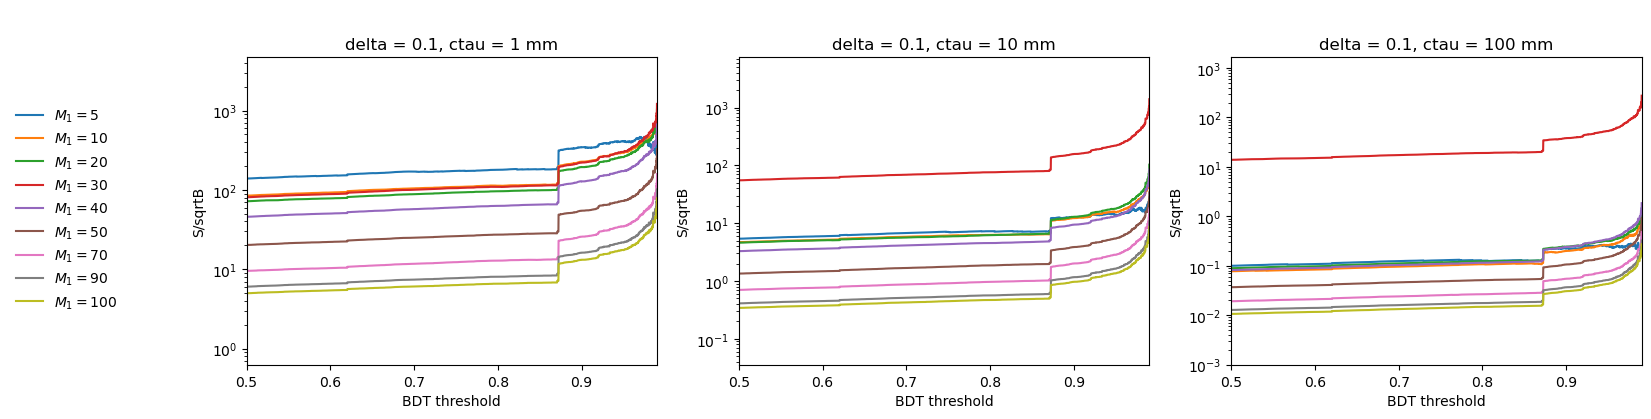

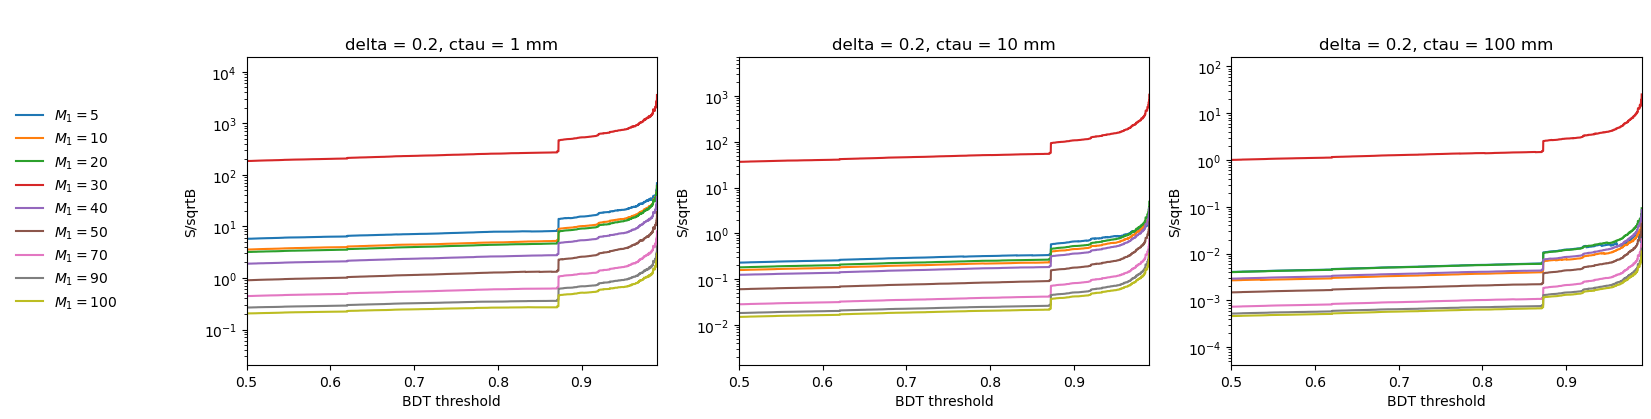

In [17]:
from matplotlib.lines import Line2D


m1s = [5, 10, 20, 30, 40, 50, 70, 90, 100]
ctaus = [1, 10, 100]
deltas = [0.1, 0.2]

for delta in deltas:
    fig,axes = plt.subplots(1,3,figsize=(18,4))
    
    for idx, ctau in enumerate(ctaus):
        for m1 in m1s:
            sig_point = si[ (si.m1 == m1) & (si.delta == delta) & (si.ctau == ctau) ].name[0]
            axes[idx].plot(bdts, s_over_b[sig_point], label=f'm1 = {m1} GeV')
    
        axes[idx].set_title(f'delta = {delta}, ctau = {ctau} mm')
        axes[idx].set_xlabel('BDT threshold')
        axes[idx].set_ylabel('S/sqrtB')
    
        axes[idx].set_yscale('log')

        axes[idx].set_xlim([0.5,0.99])
    
    
    massColors = {m1s[i]:f"C{i}" for i in range(len(m1s))}
    lines = [Line2D([0], [0], label=f"$M_1 = {m}$", color=massColors[m]) for m in sorted(list(massColors.keys()))]
    
    legend_ax = fig.add_axes([0, 0, 0.05, 1])  # Adjust the values as needed
    legend_ax.axis('off')
    legend_ax.legend(handles=lines,loc='center',frameon=False)

Text(0.5, 1.0, 'All Background')

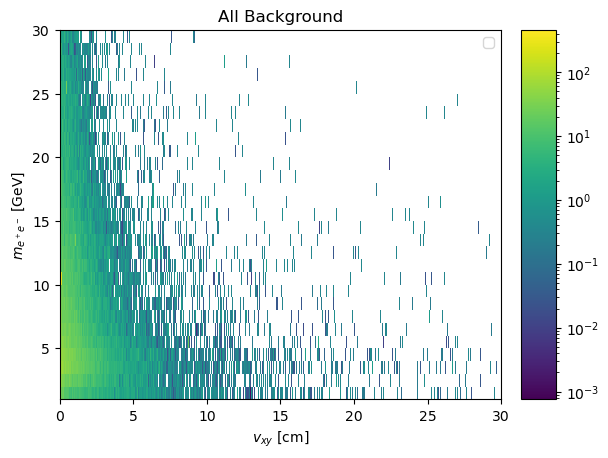

In [122]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_mass',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 2j,
    'xlim': [0,30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0,30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict)

plt.title('All Background')
#utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets', 'DY'])


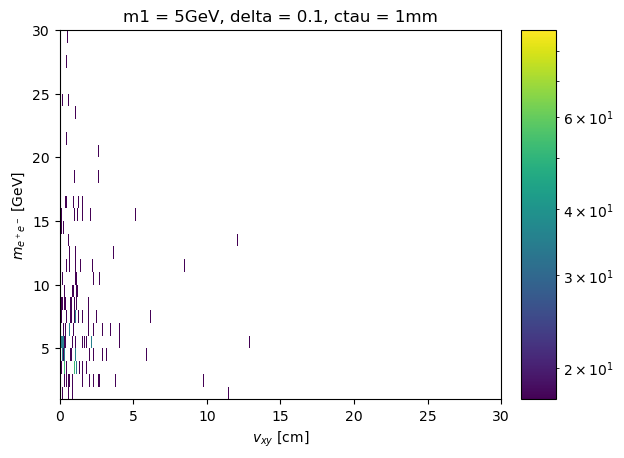

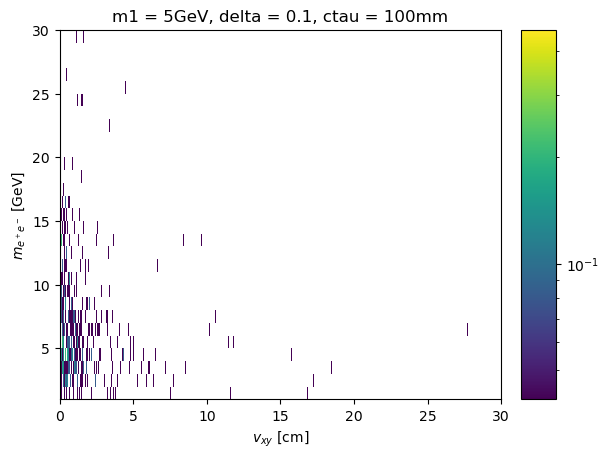

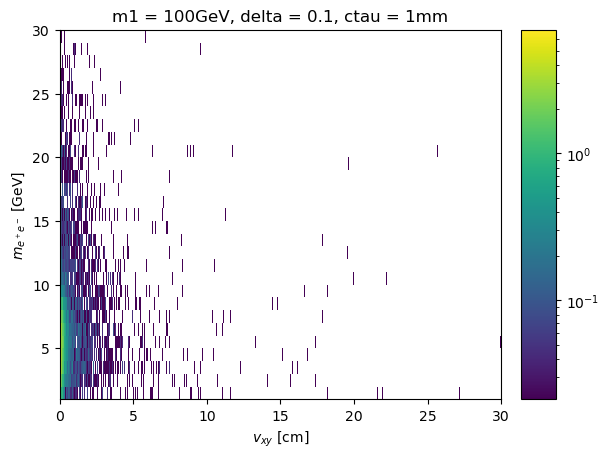

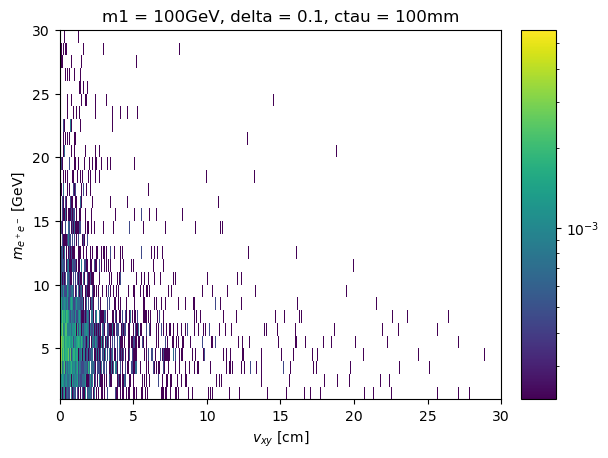

In [123]:

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

In [124]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'xrebin': 2j,
    'yrebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}


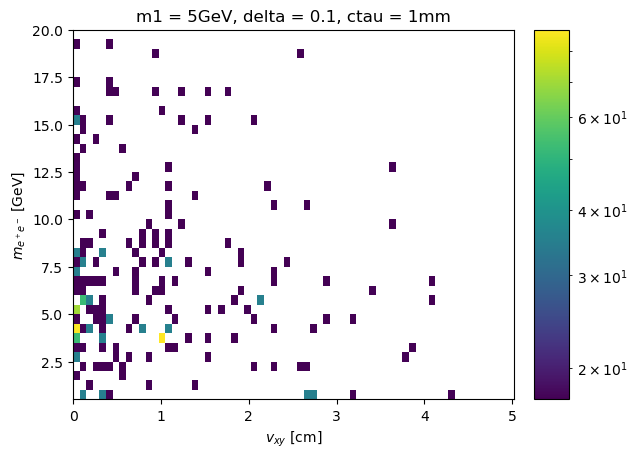

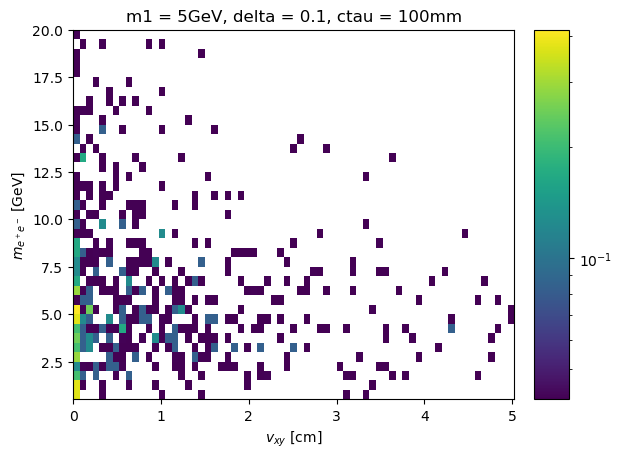

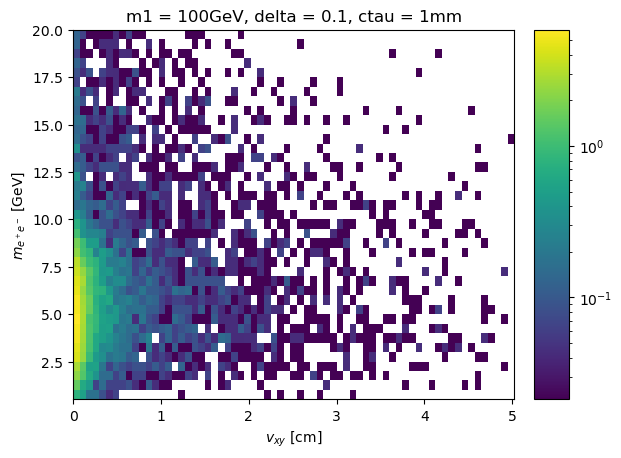

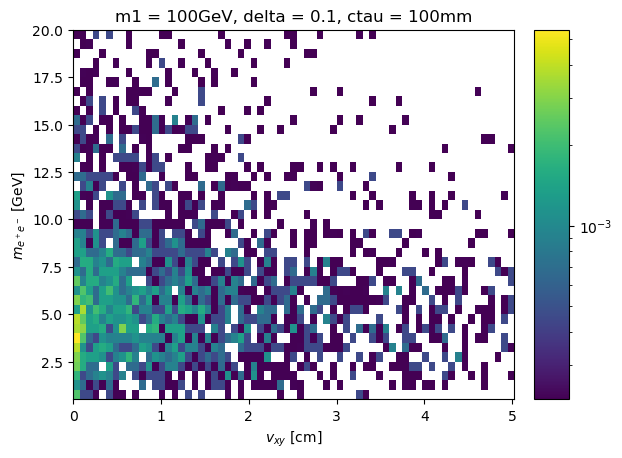

In [125]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_mass',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 3j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}


m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### dxy1_vs_dxy2

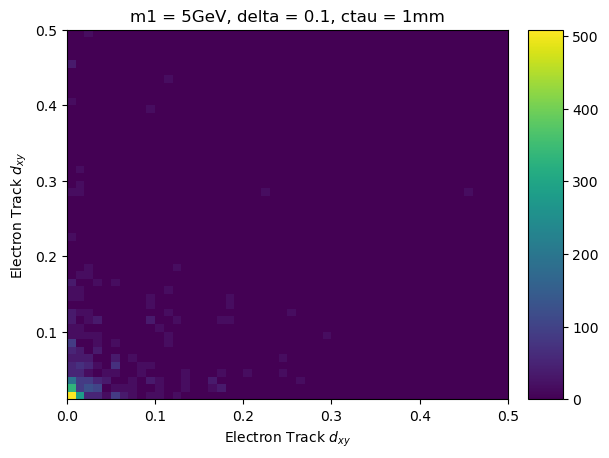

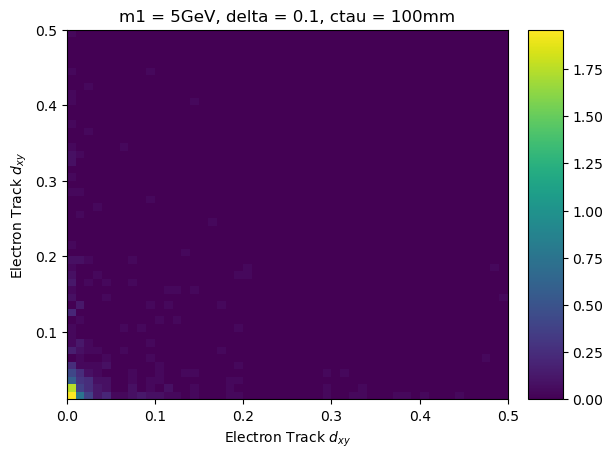

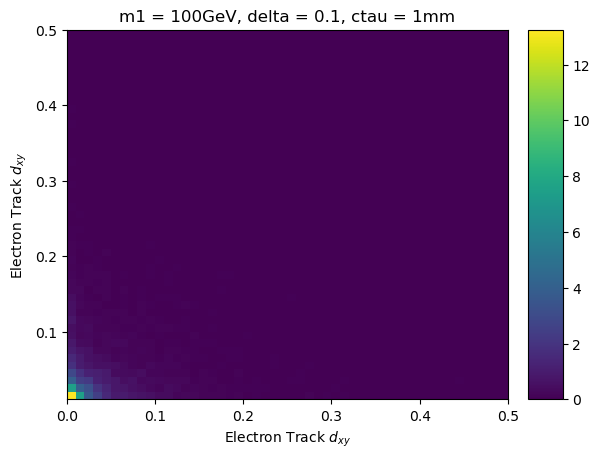

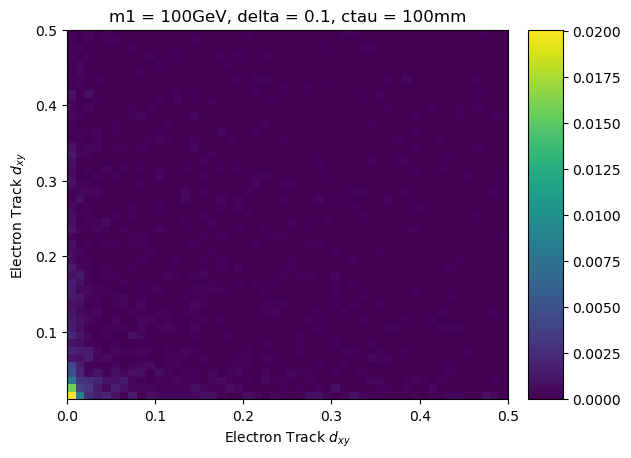

In [126]:
# Plot settings
plot_dict = {
    'variable': 'dxy1_vs_dxy2',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0, 0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}


m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_mindxy

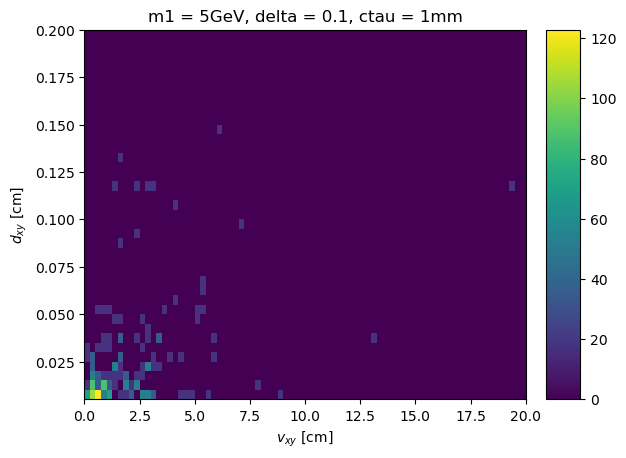

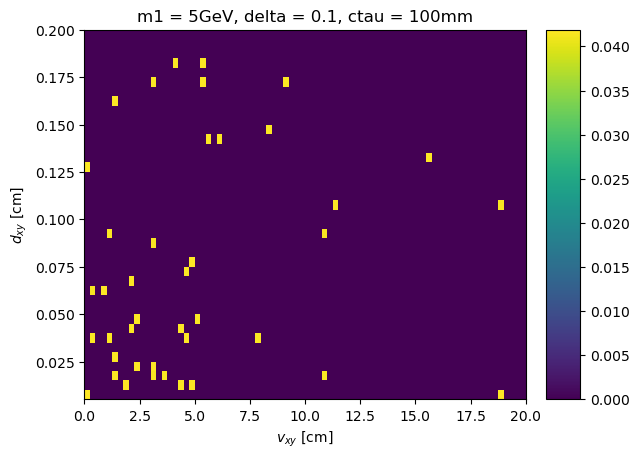

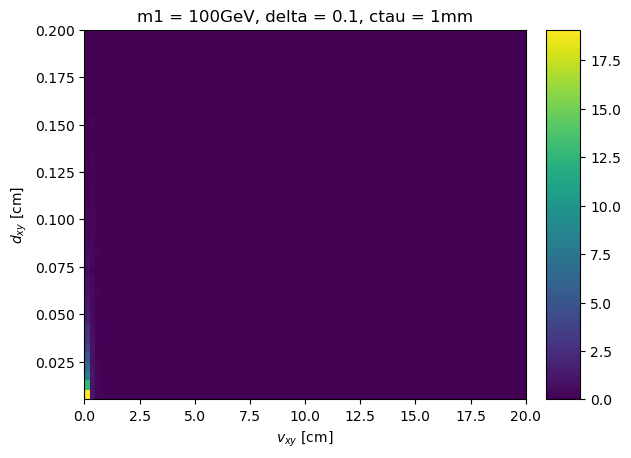

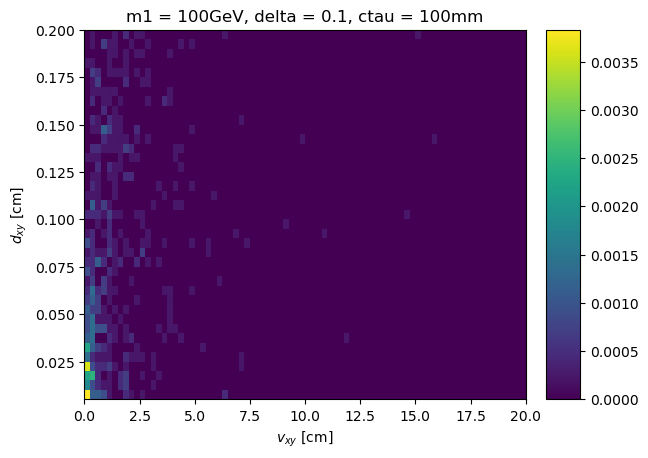

In [127]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_mindxy',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_chi2

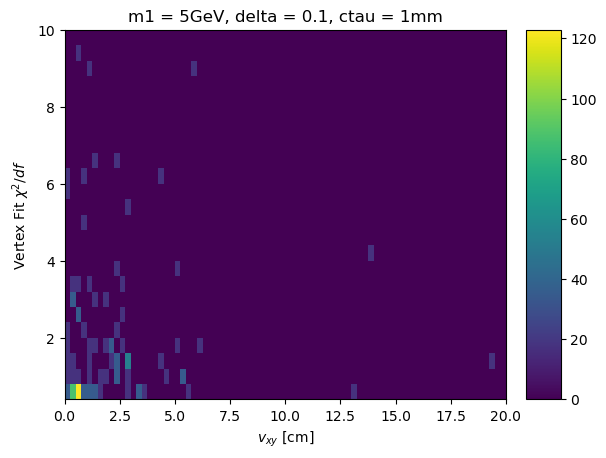

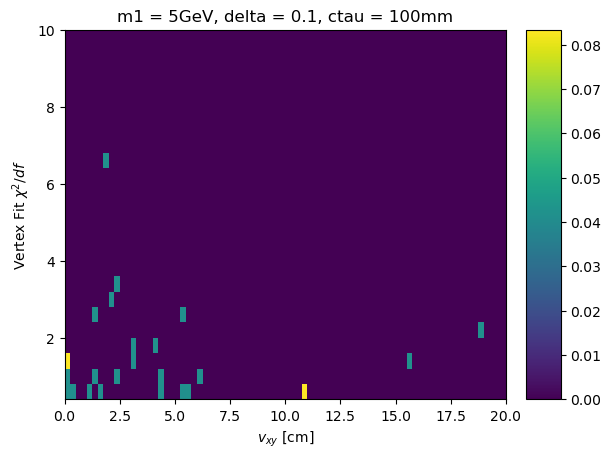

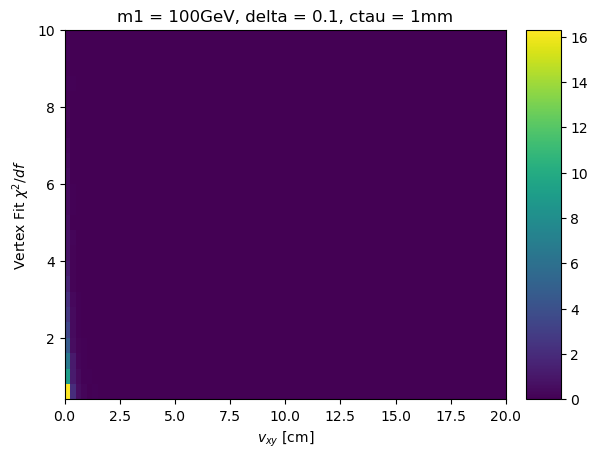

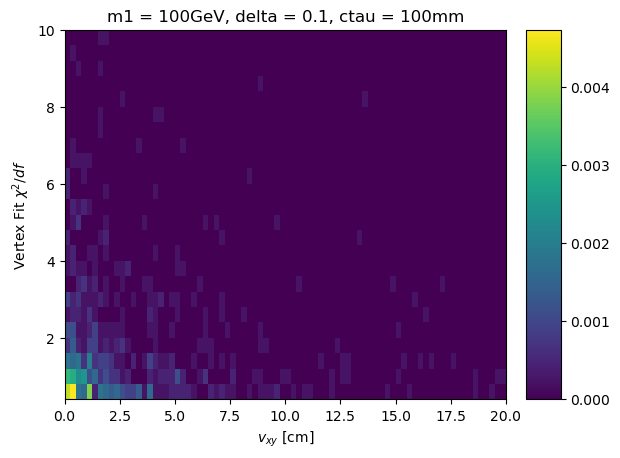

In [128]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_chi2',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 2j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_dR

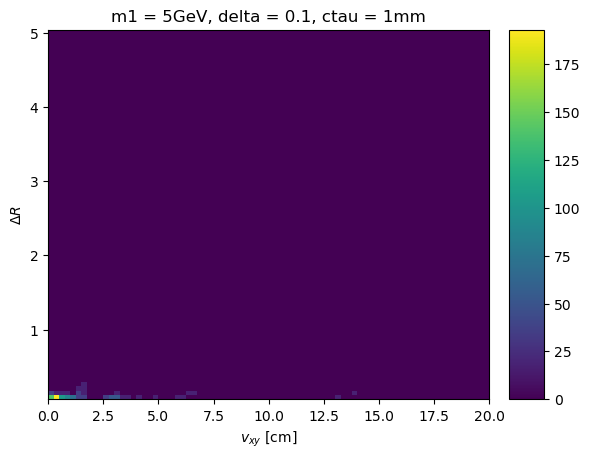

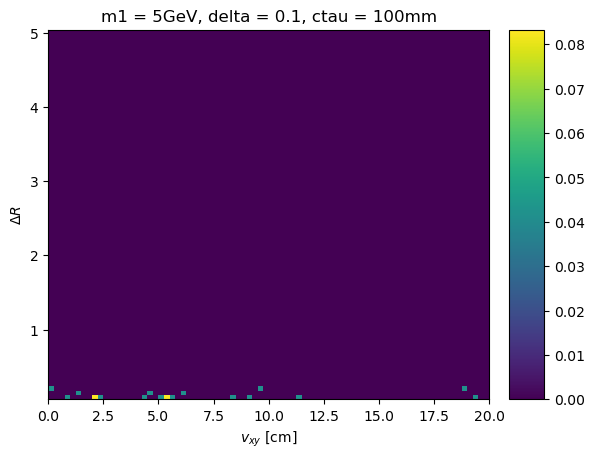

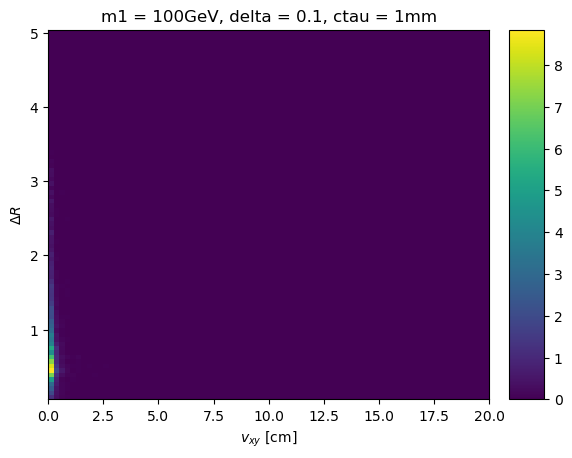

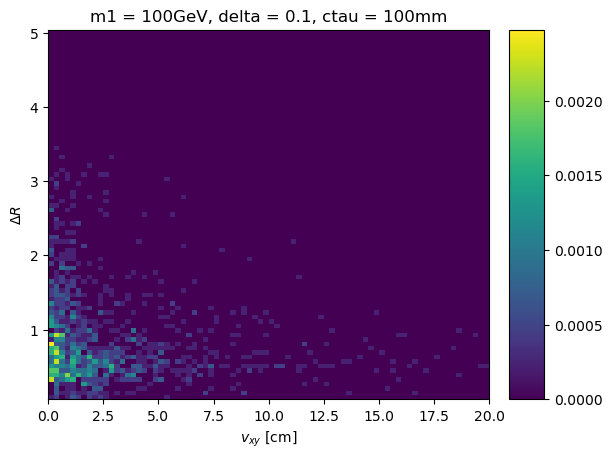

In [129]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_dR',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_mass

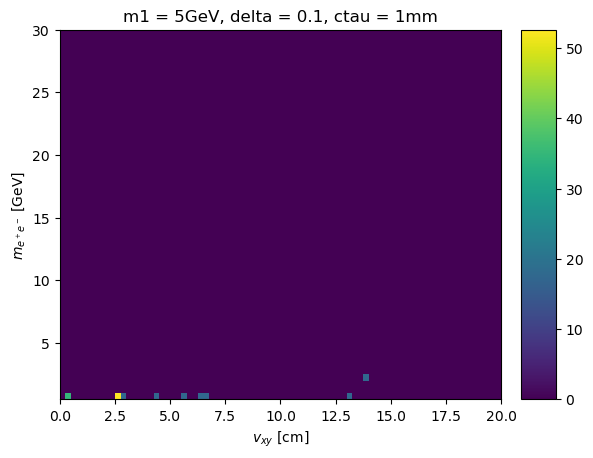

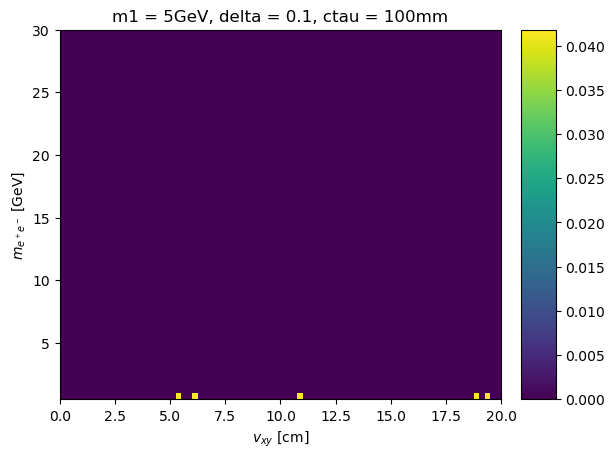

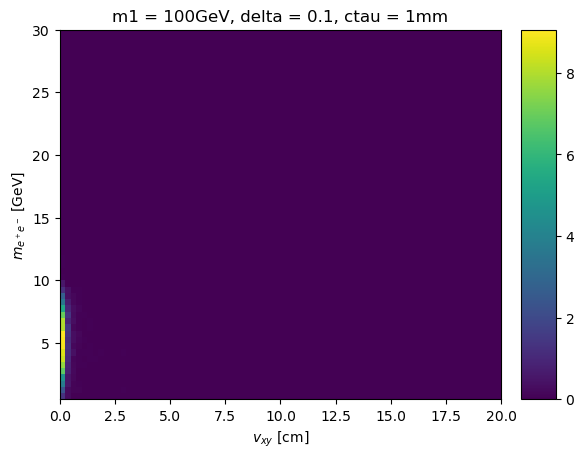

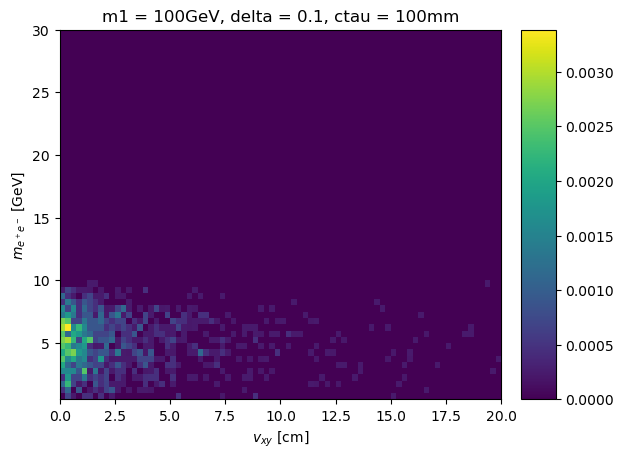

In [130]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_mass',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_METdPhi

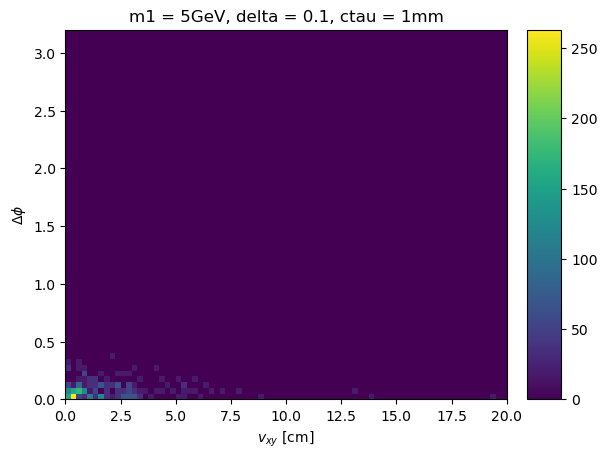

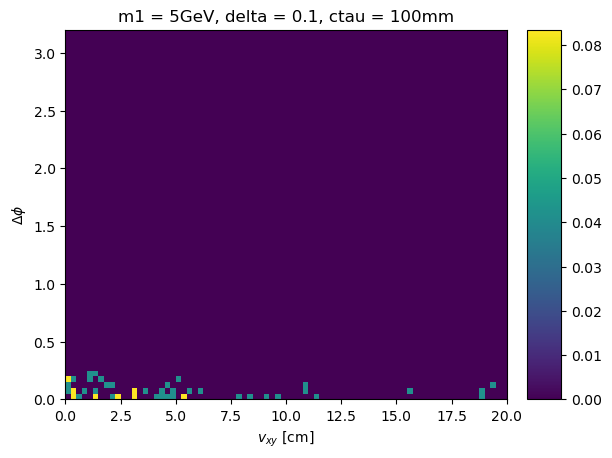

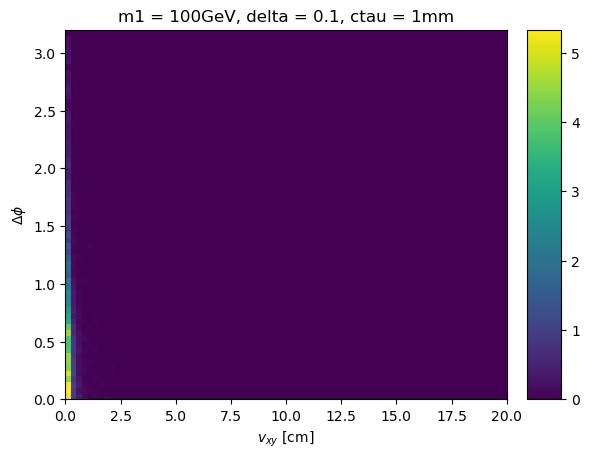

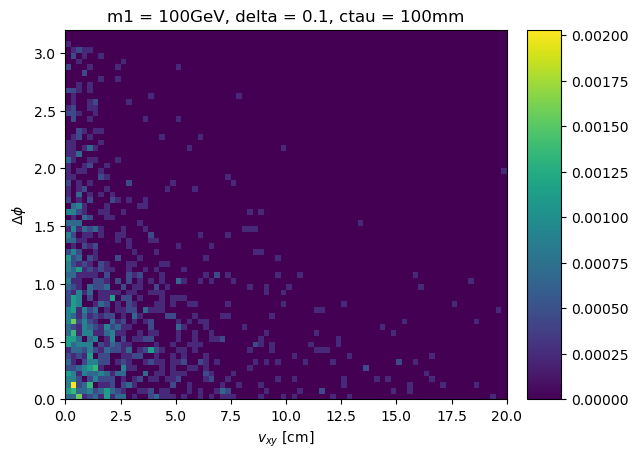

In [131]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_METdPhi',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_vxySignif

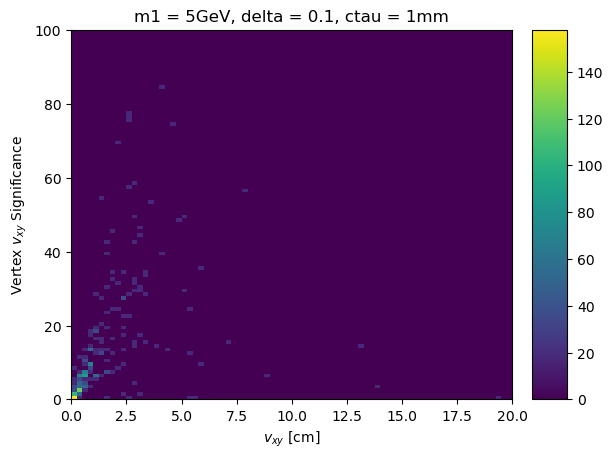

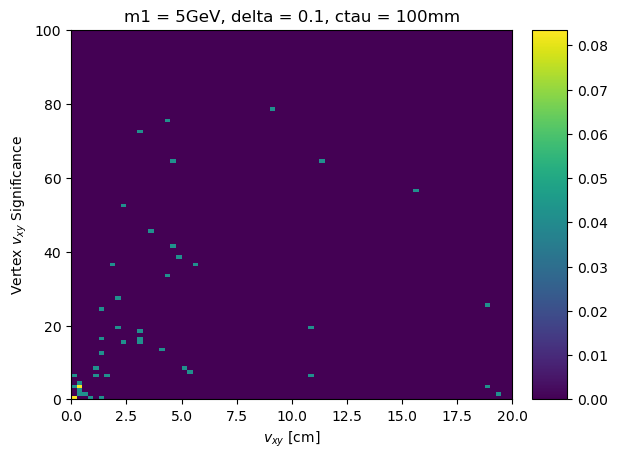

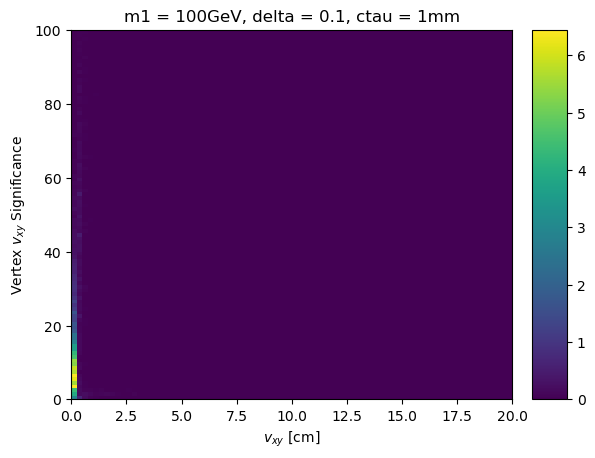

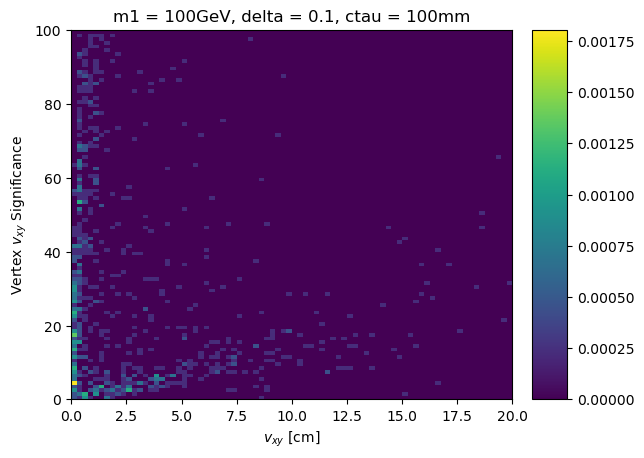

In [132]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_vxySignif',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_pt

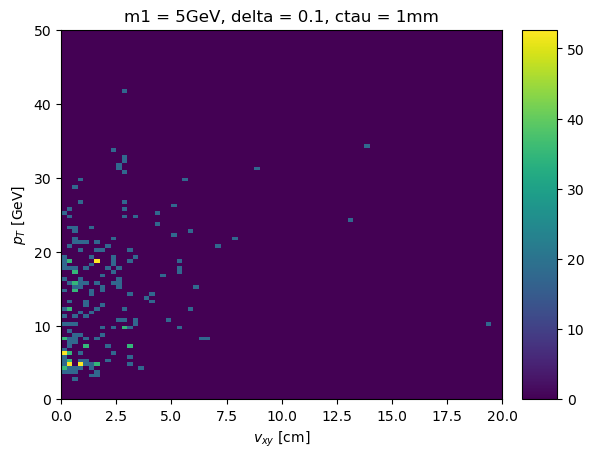

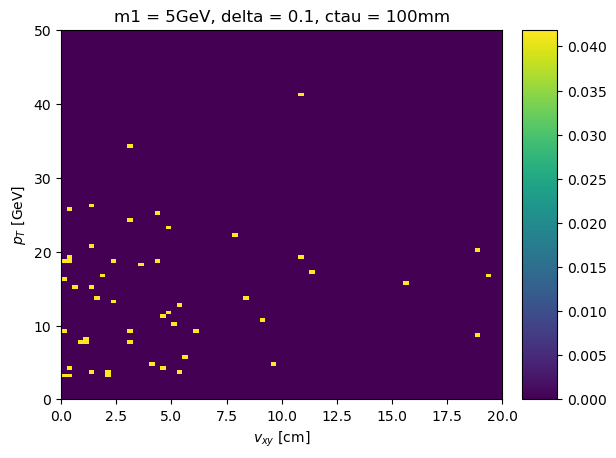

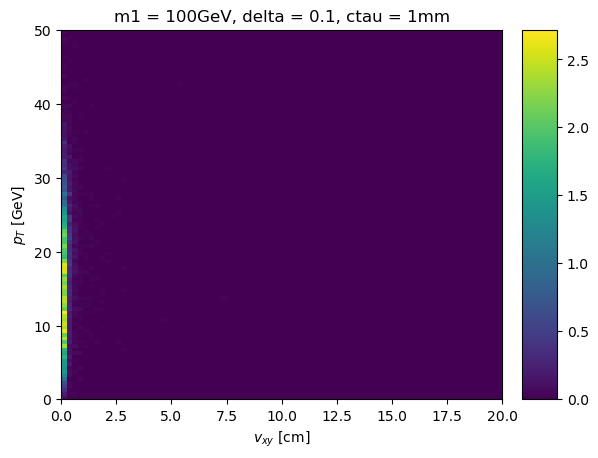

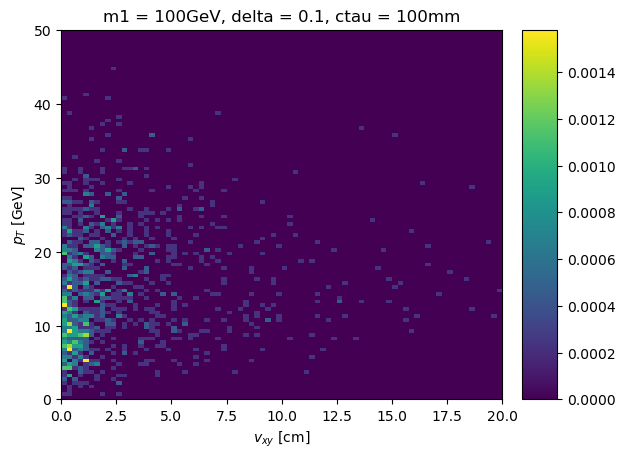

In [133]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_pt',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_sign_eta

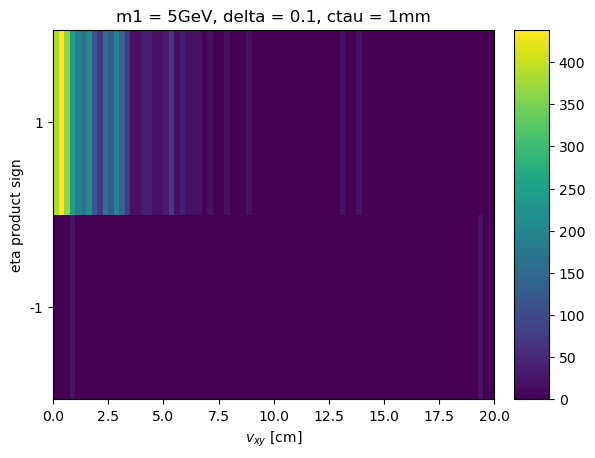

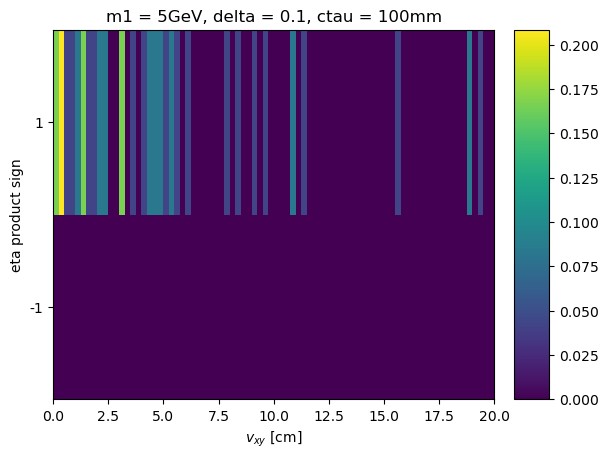

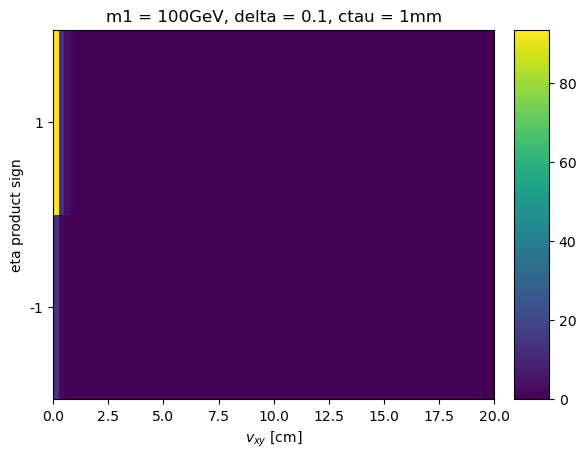

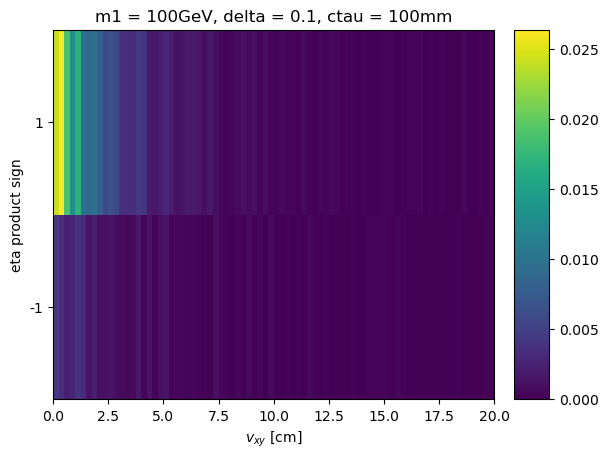

In [134]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_sign_eta',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_matchType

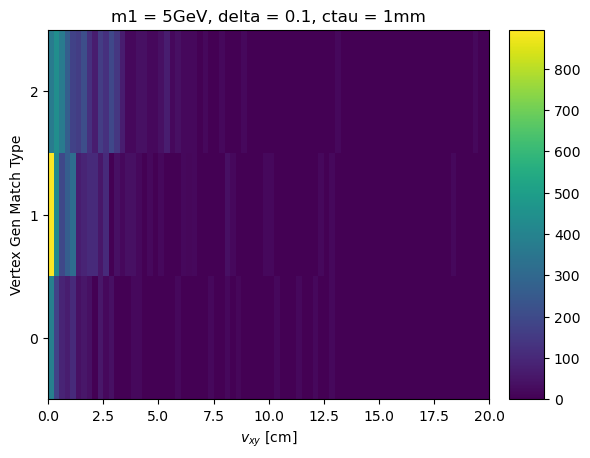

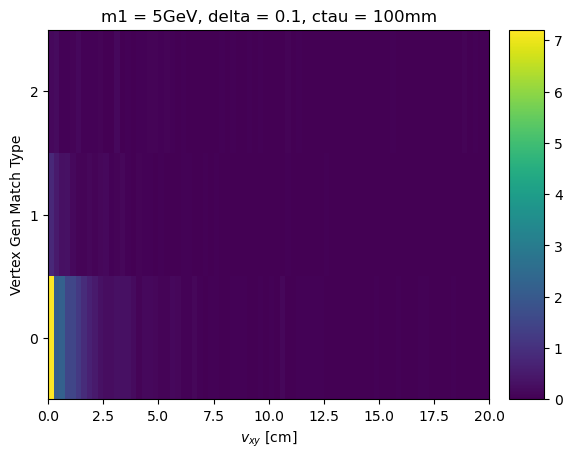

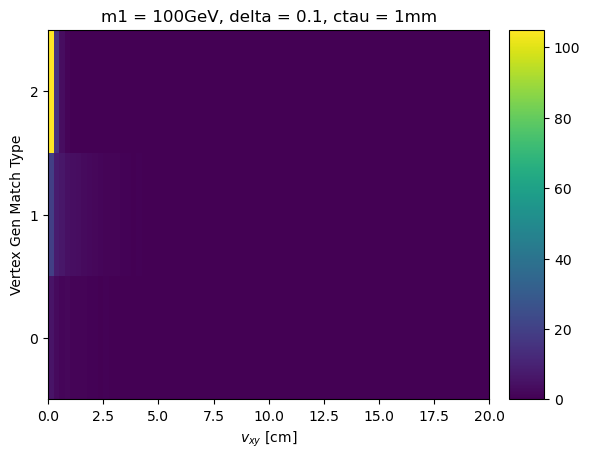

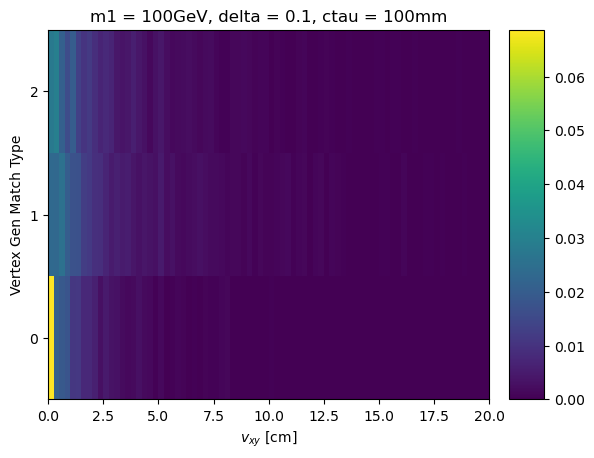

In [135]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_minDxy_vs_matchType

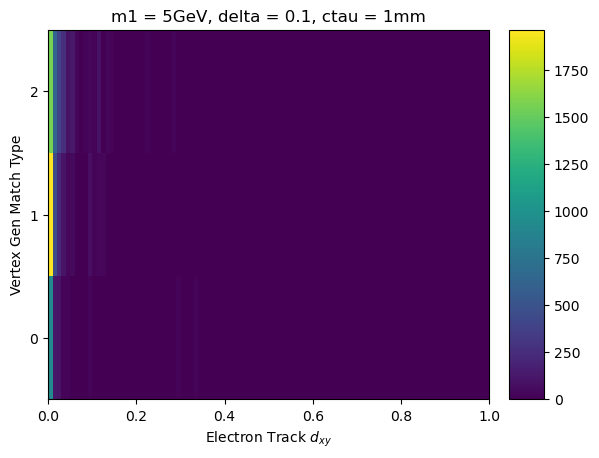

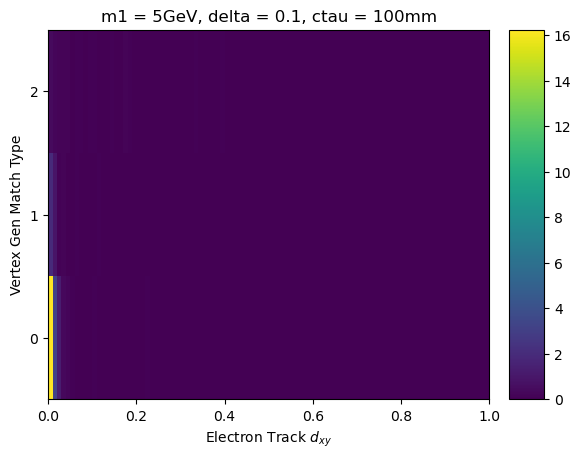

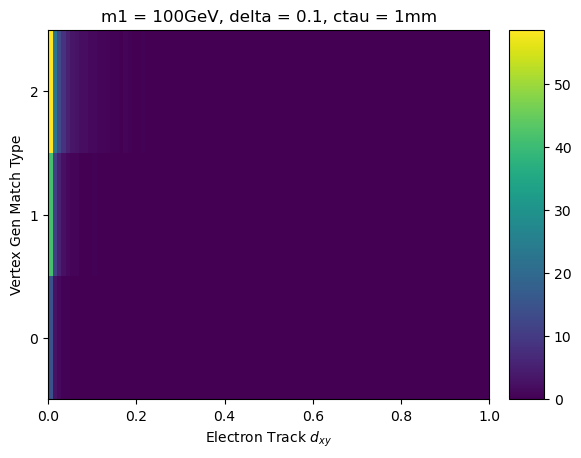

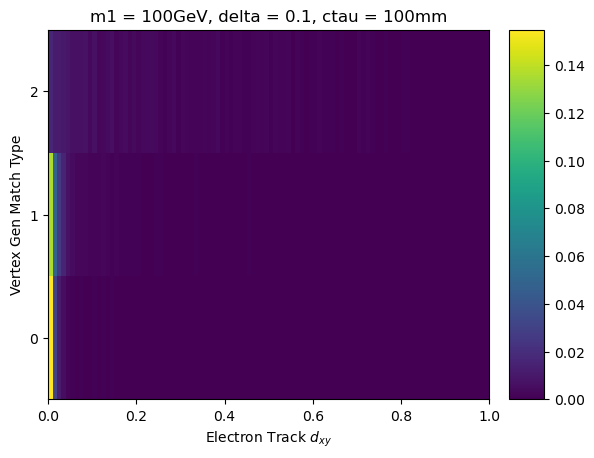

In [136]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDxy_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_minDz_vs_matchType

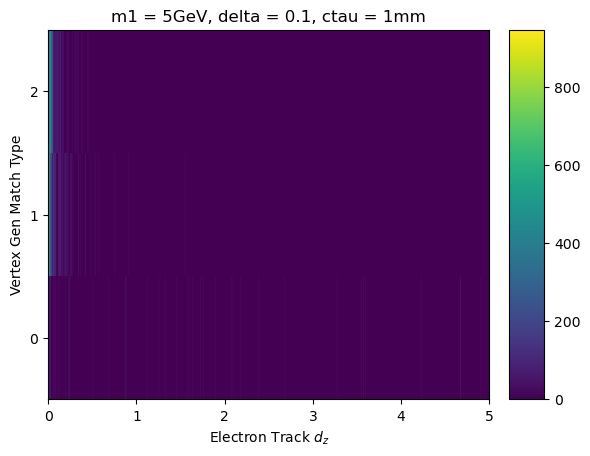

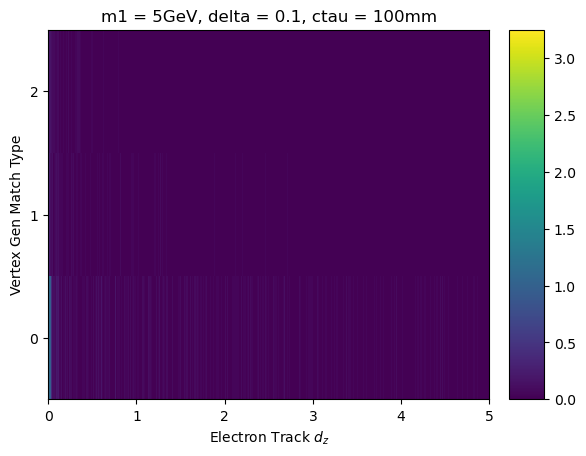

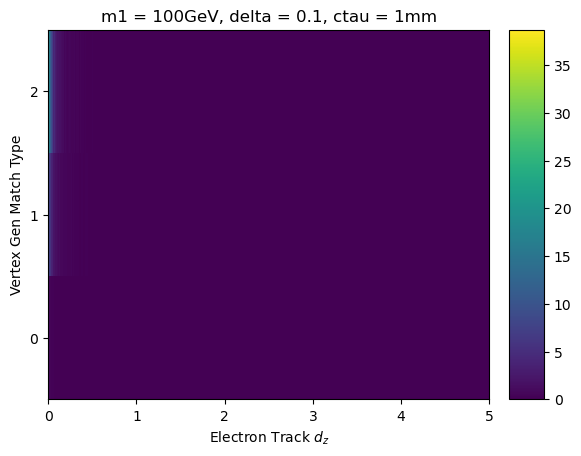

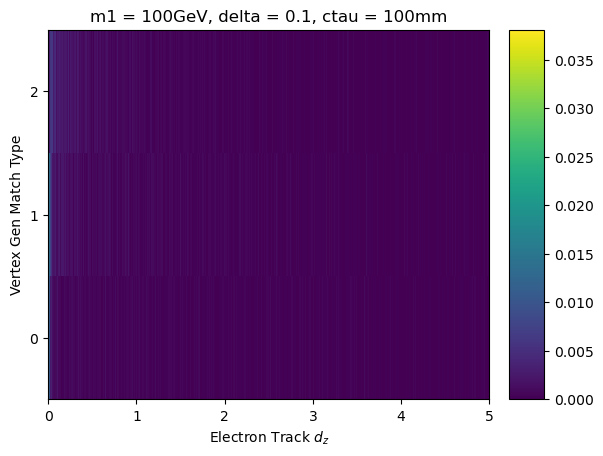

In [137]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDz_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_deltaDxy_vs_matchType

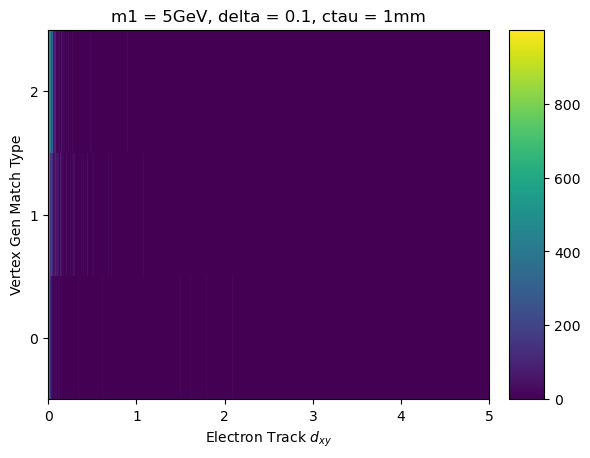

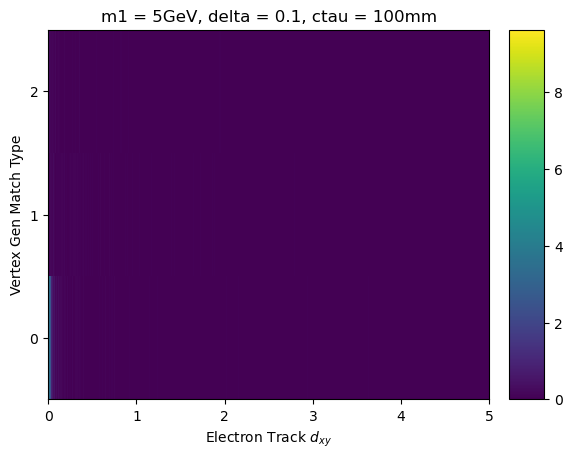

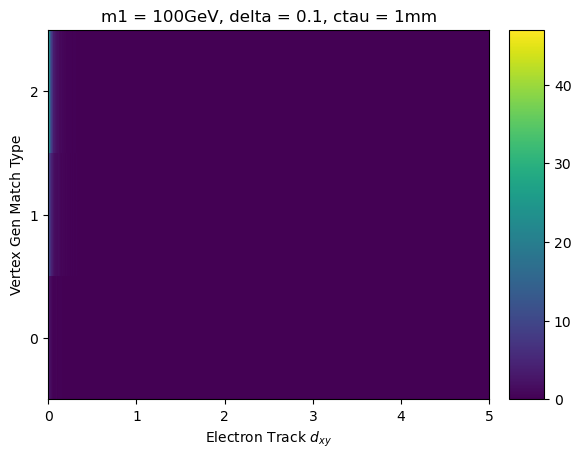

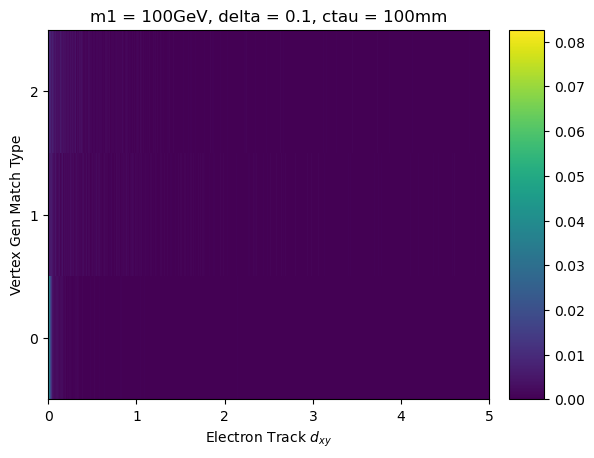

In [138]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDxy_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_deltaDz_vs_matchType

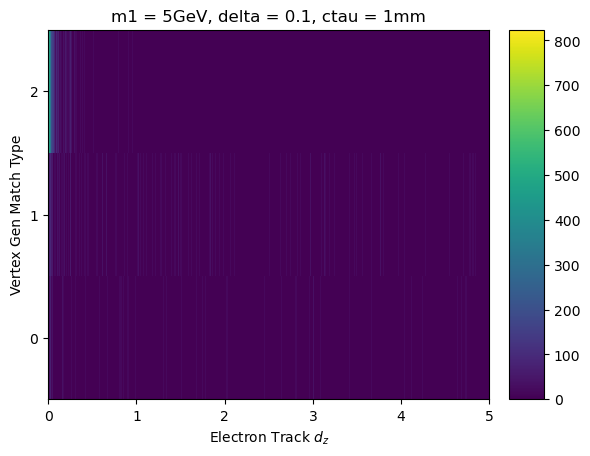

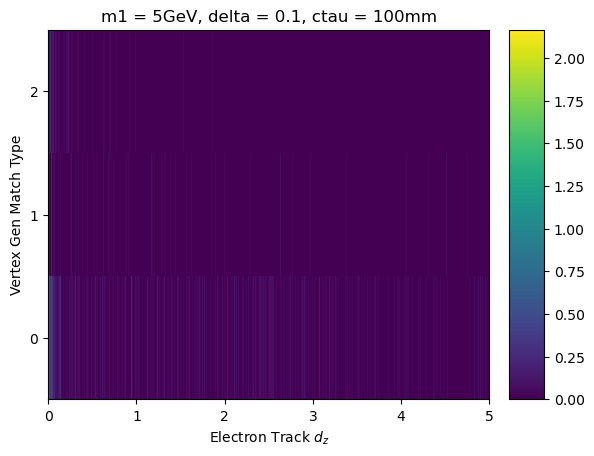

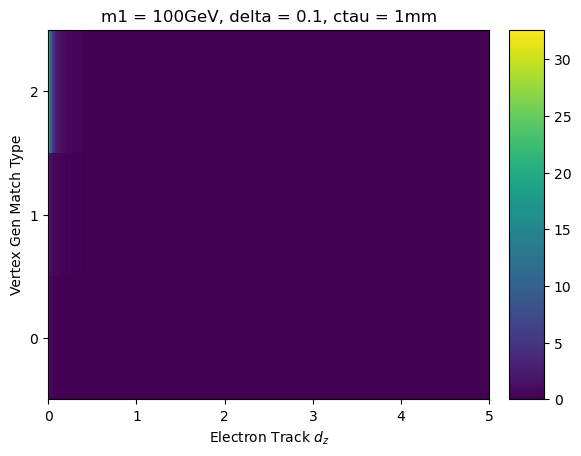

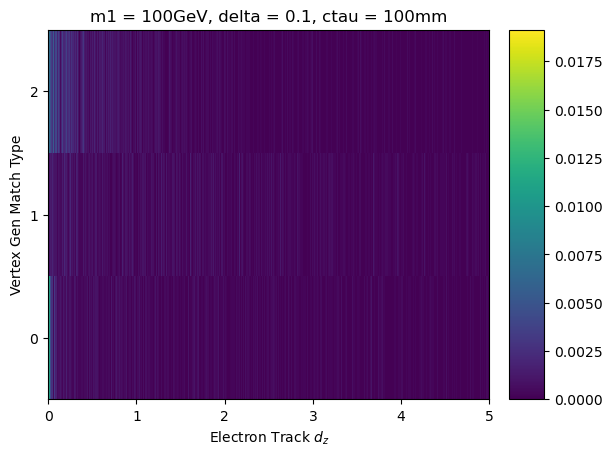

In [139]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDz_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxySignif_vs_matchType

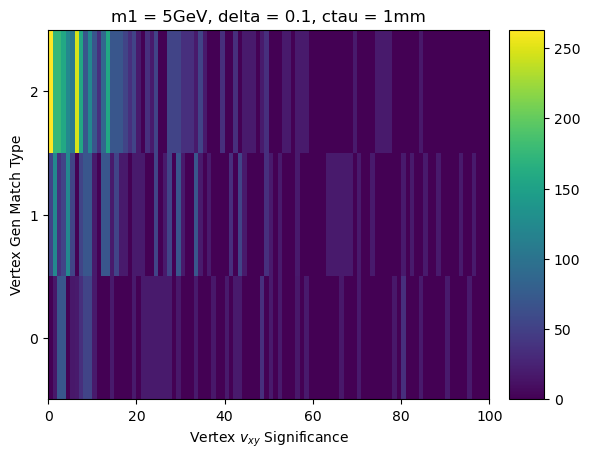

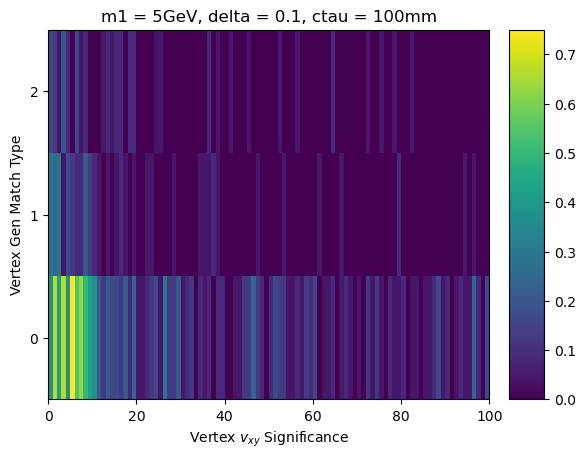

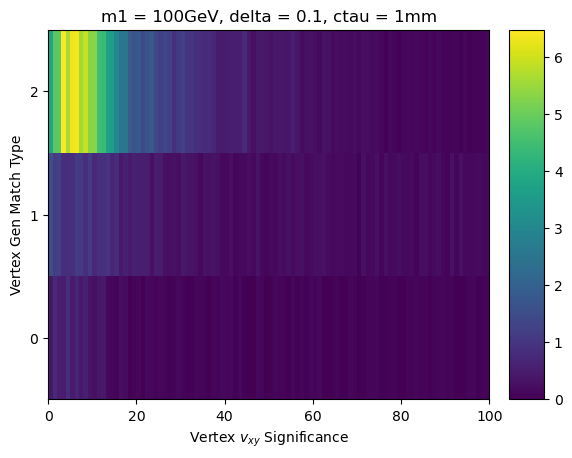

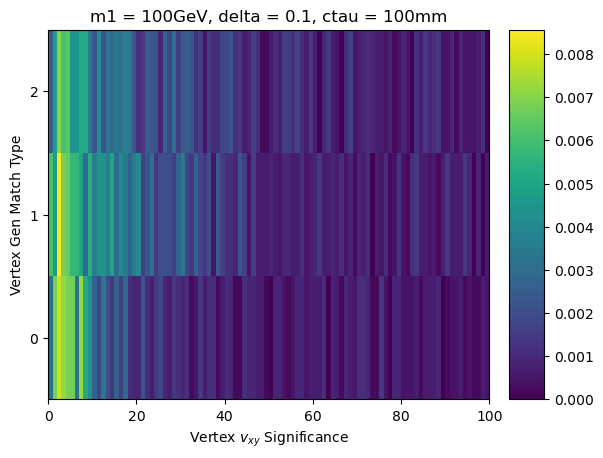

In [140]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxySignif_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_chi2_vs_matchType

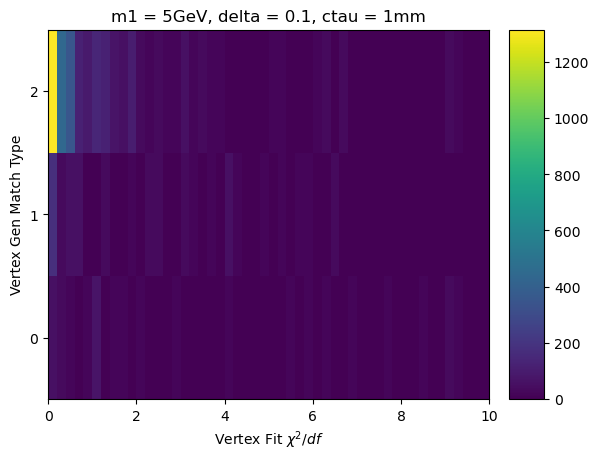

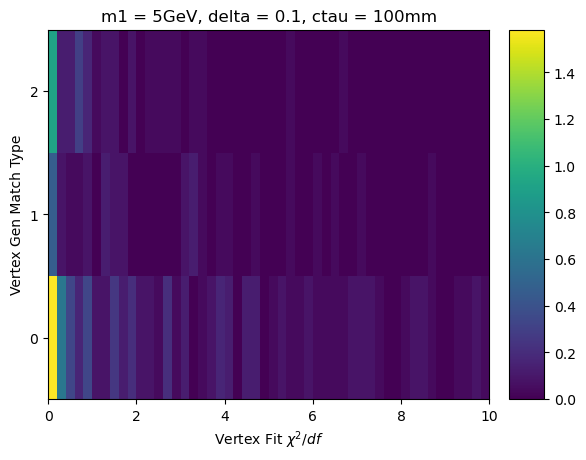

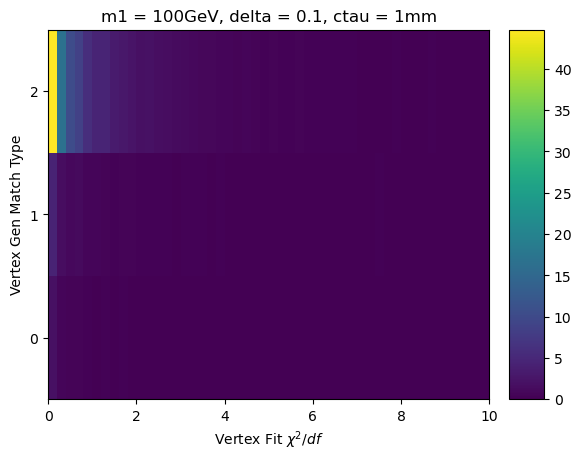

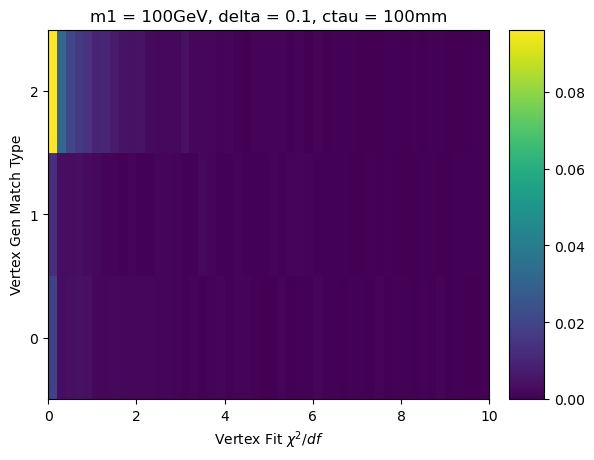

In [141]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_chi2_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_dR_vs_matchType

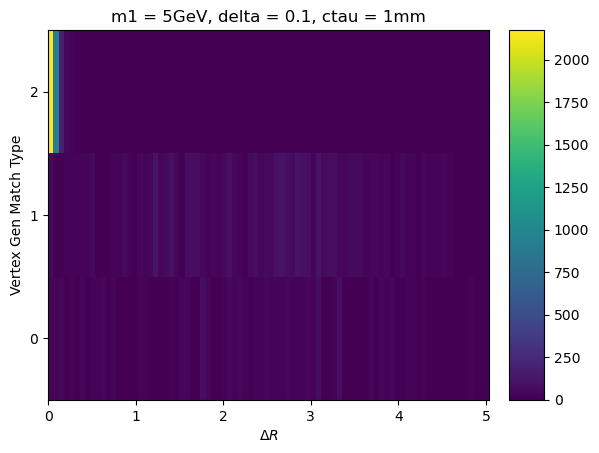

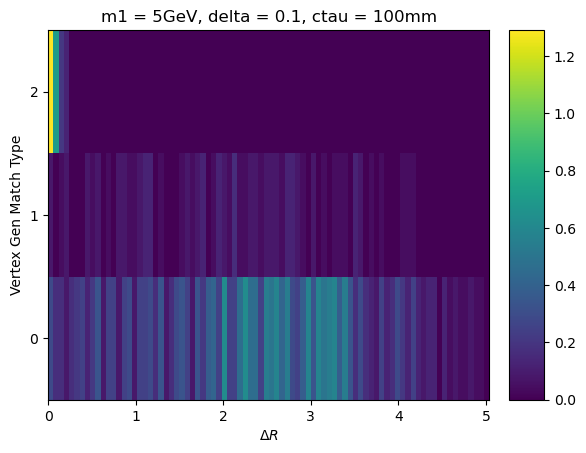

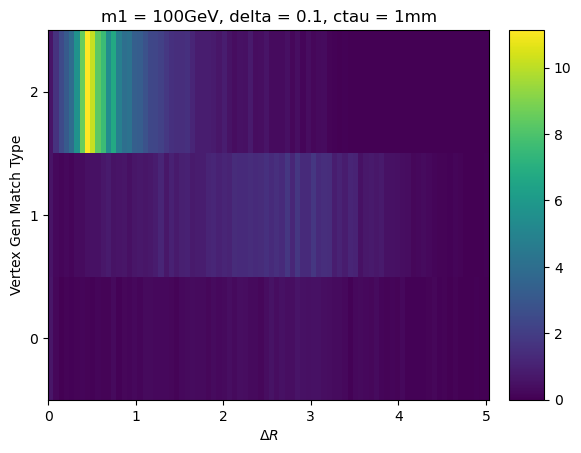

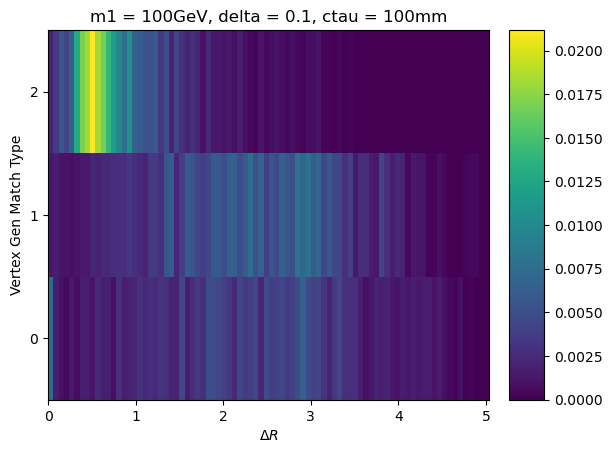

In [142]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dR_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_dEta_vs_matchType

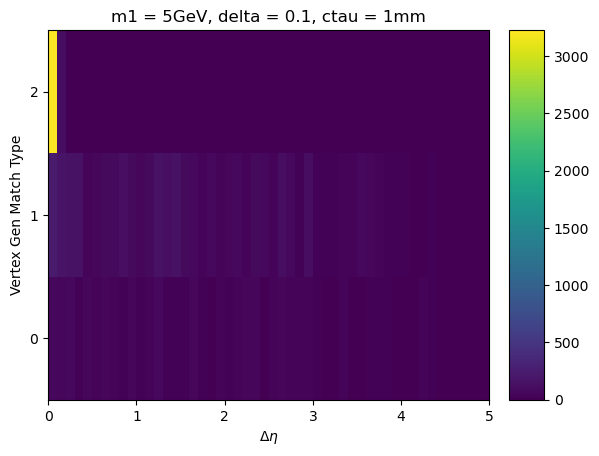

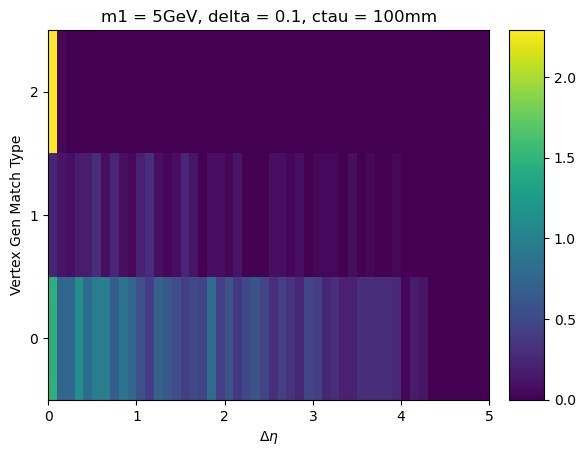

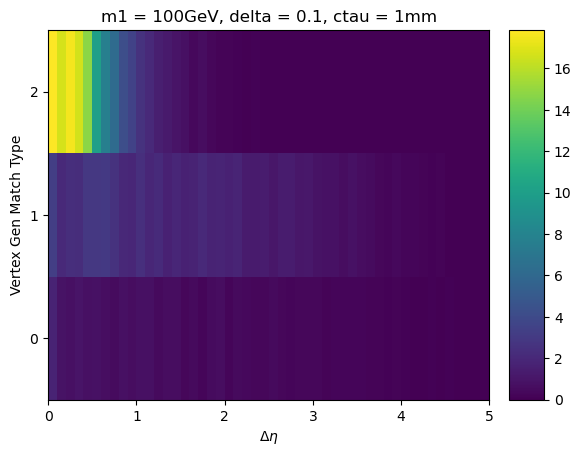

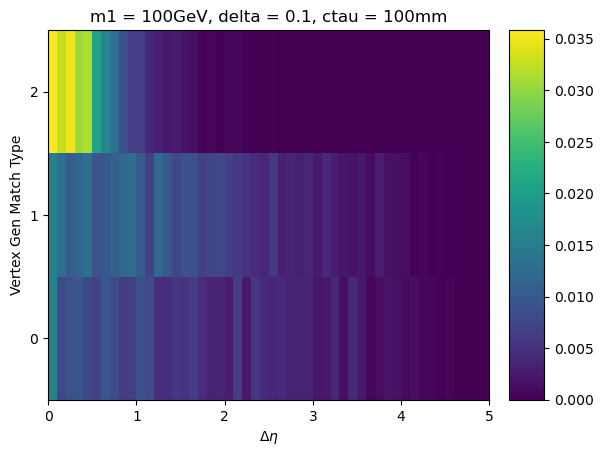

In [143]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dEta_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_dPhi_vs_matchType

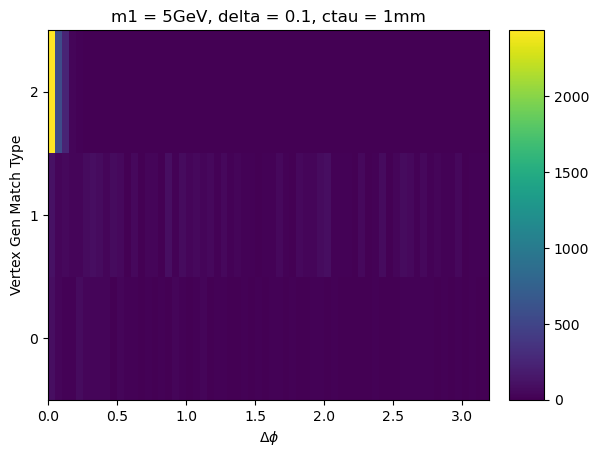

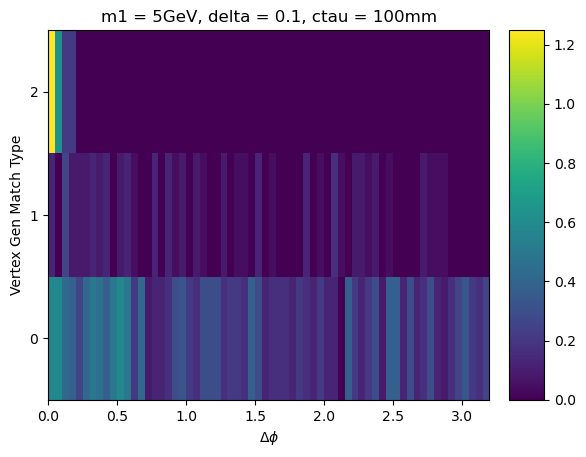

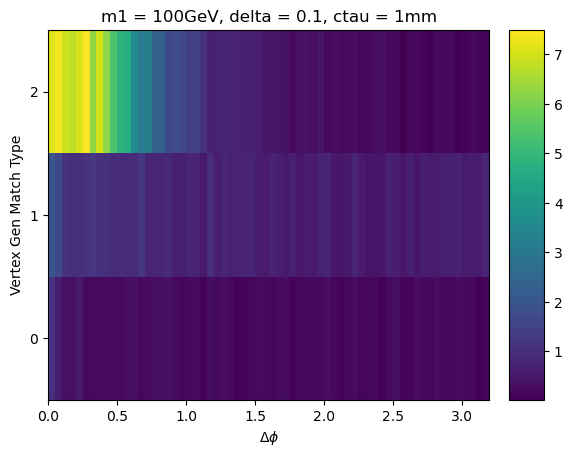

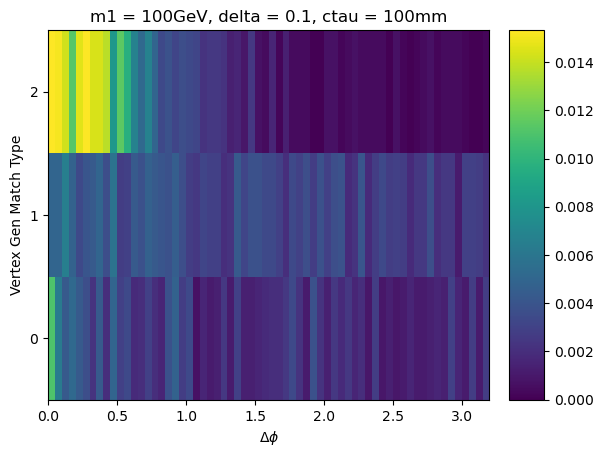

In [144]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dPhi_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_sign_eta_vs_matchType

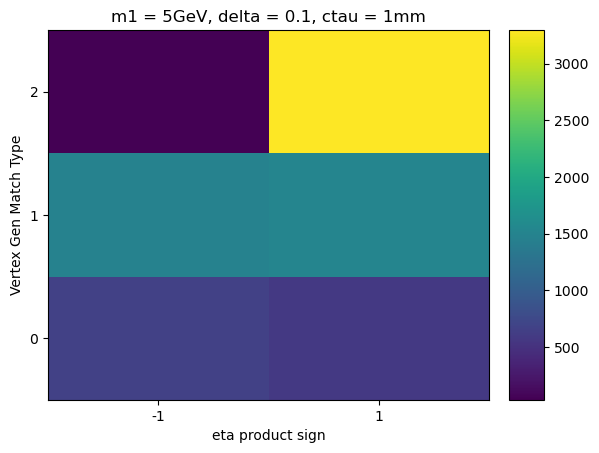

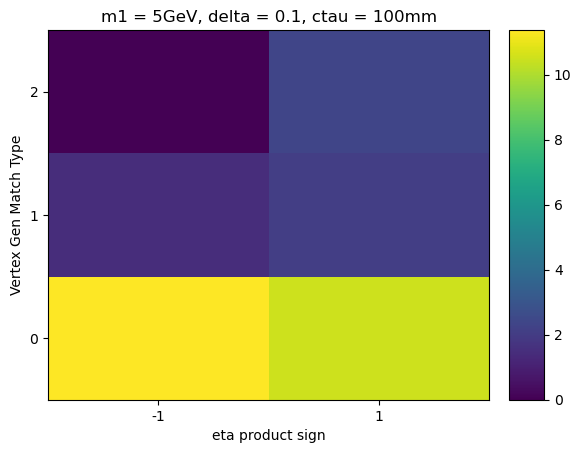

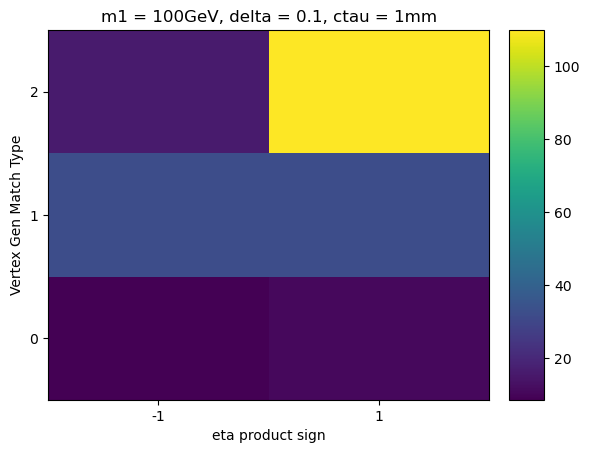

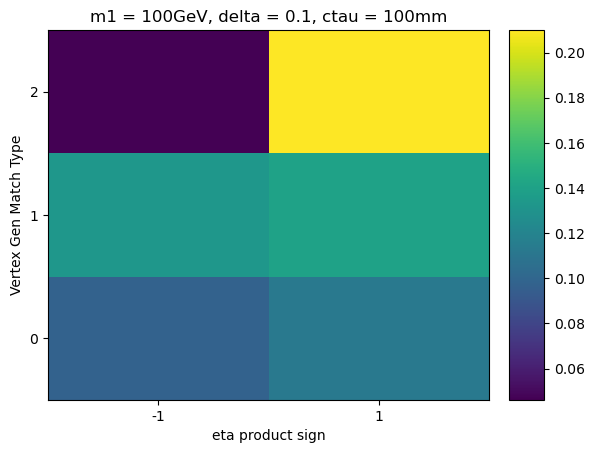

In [145]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_sign_eta_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_pt_vs_matchType

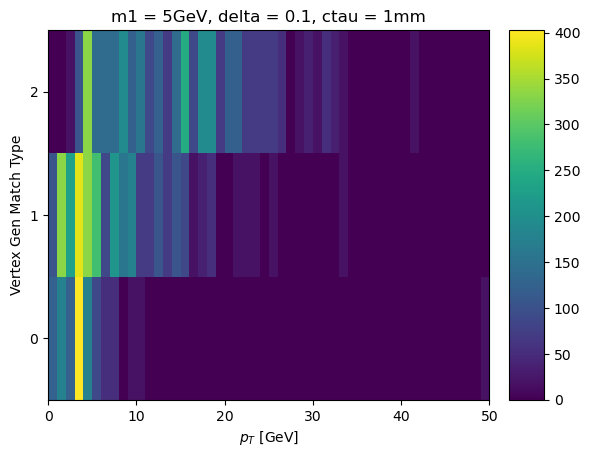

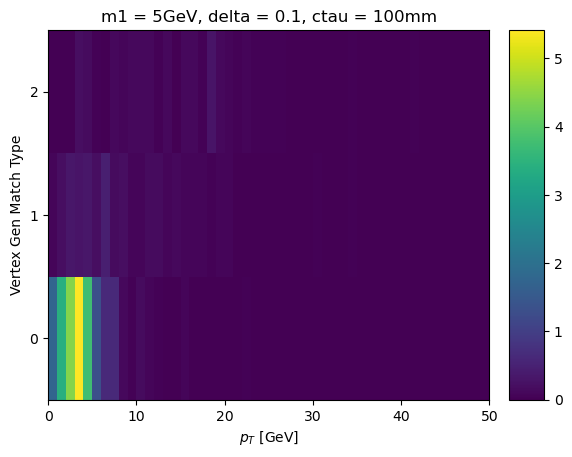

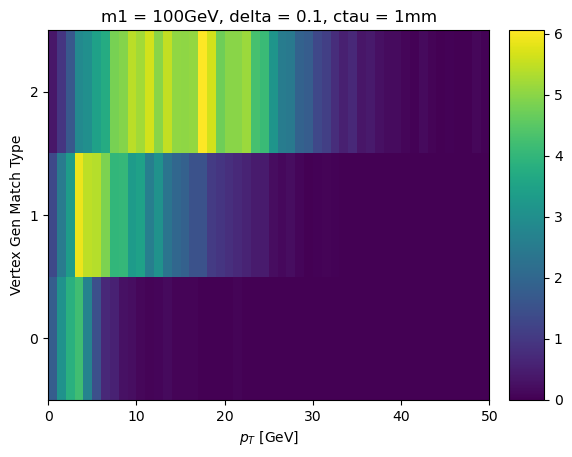

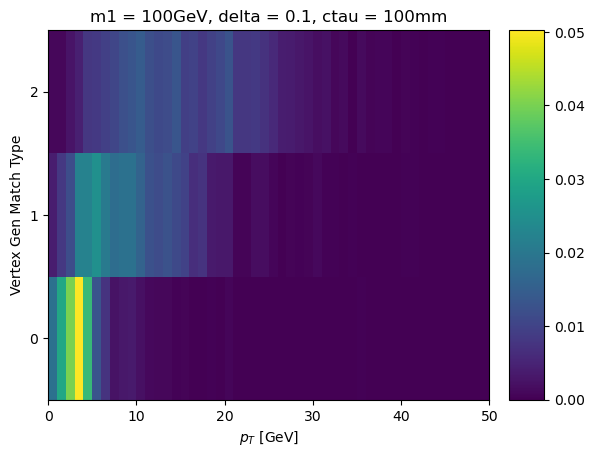

In [146]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_pt_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_eta_vs_matchType

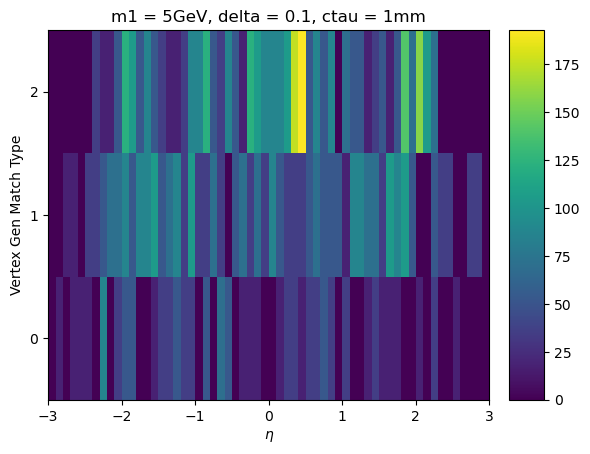

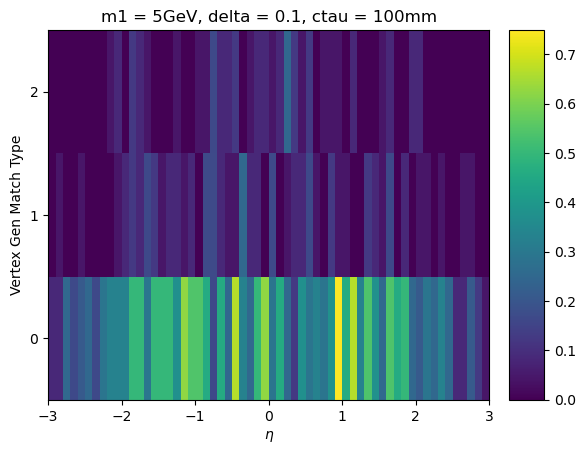

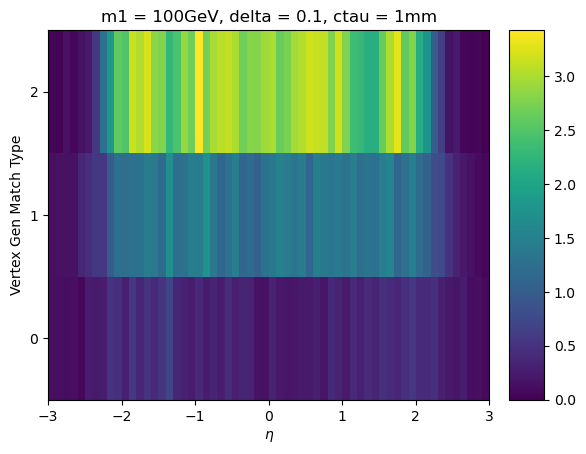

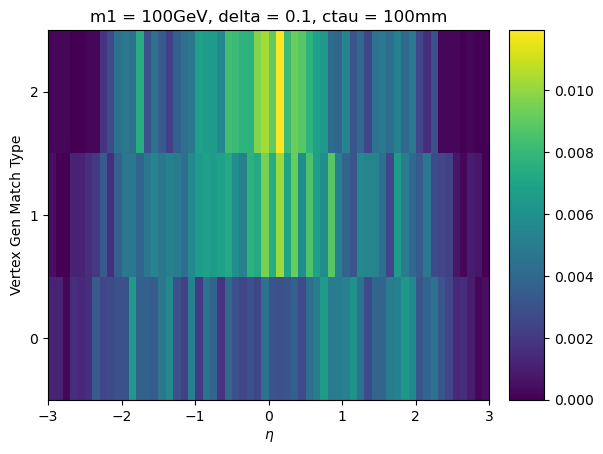

In [147]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_eta_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_phi_vs_matchType

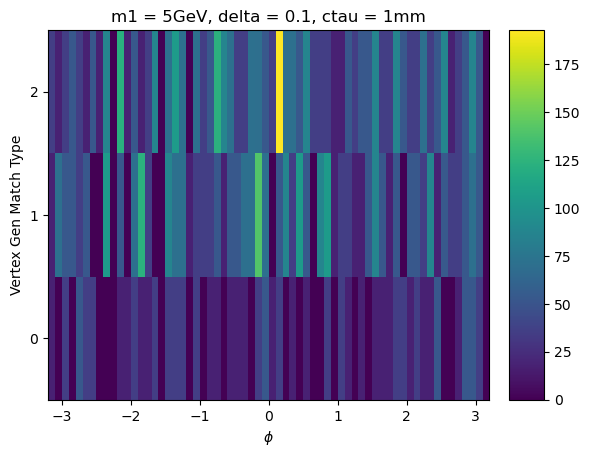

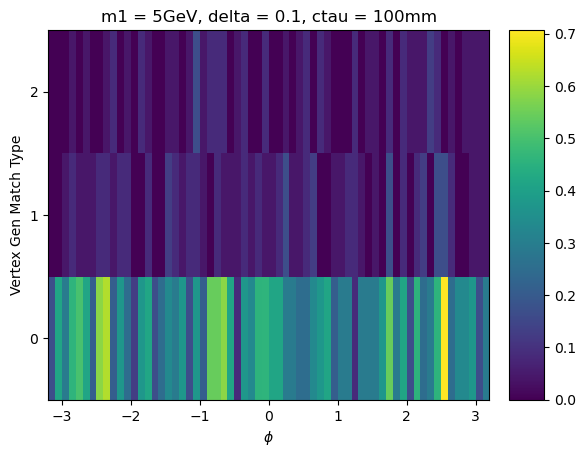

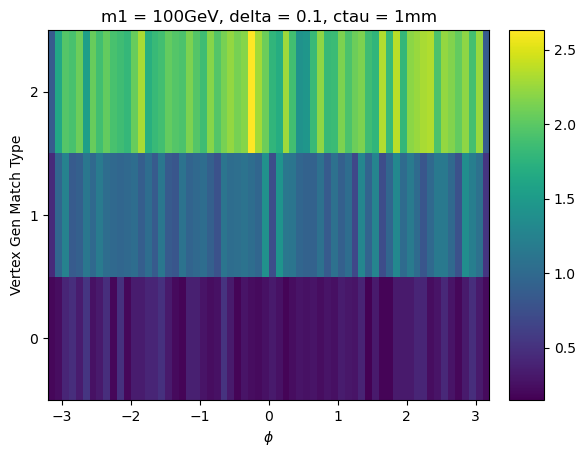

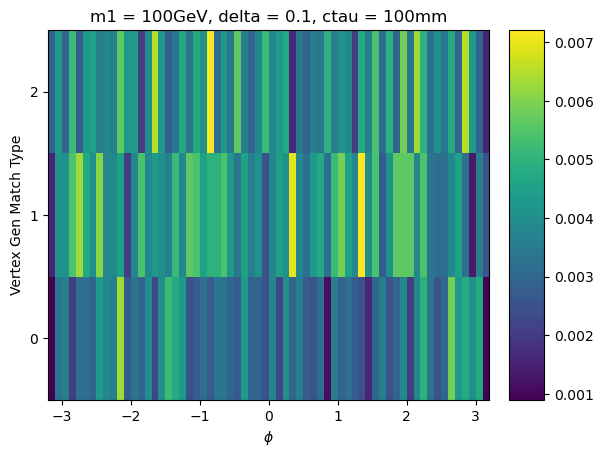

In [148]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_phi_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_mass_vs_matchType

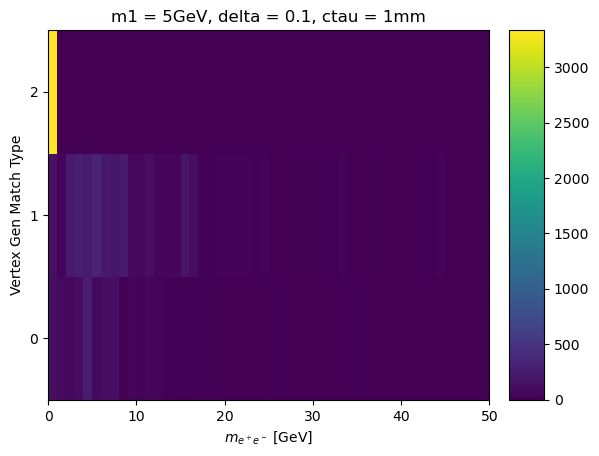

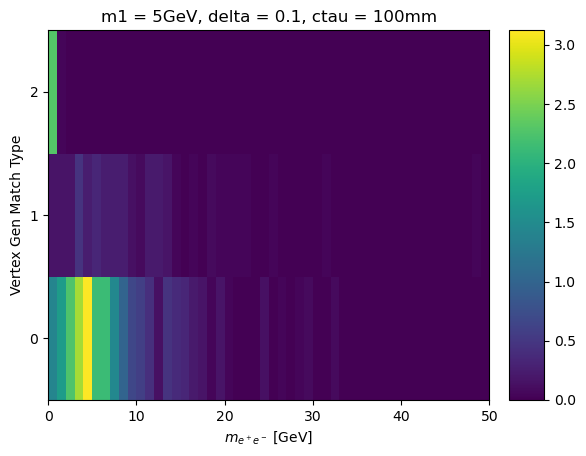

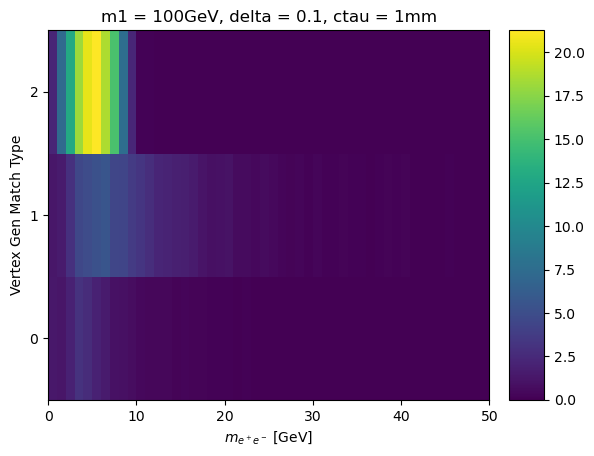

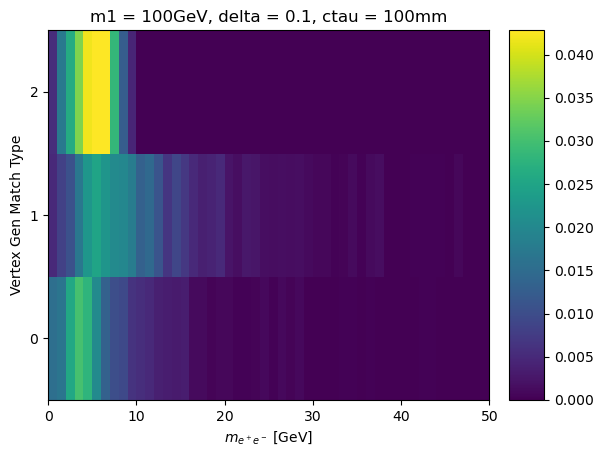

In [149]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_type_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_type_vs_matchType',
    'cut': 'cut9',
}
style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [50]
deltas = [0.2]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()